#Desafio Final: Previsão de Doenças Cardíacas

O conjunto de dados é o conjunto de dados Statlog Heart Disease obtido do repositório UCI. O conjunto de dados consiste em dados de 270 indivíduos. Existem 14 colunas no conjunto de dados (que foram extraídas de um conjunto maior de 75). Sem valores ausentes. A tarefa de classificação é prever se um indivíduo sofre de doença cardíaca ou não. (0: ausência, 1: presença)

**Este é um estudo importante porque a saúde é um ponto vital de pesquisa
para melhor ajudar os pacientes com certas condições. Além disso, a pressão
arterial geralmente não apresenta sintomas e, no entanto, se a pressão alta
não for tratada, pode ser um grande contribuinte para condições de saúde
mais graves, como um derrame ou ataque cardíaco [2].**

### Análise dos dados
1- Entenda a distribuição de variáveis

● Plote histogramas / boxplots

2 - Selecione as principais variáveis que você considera importante para criar o
modelo de doença cardíaca.

### Modelagem

3 - Construa um modelo de regressão linear multivariada para estimar o risco de
sofrer uma doença cardíaca.

4 - Analise o resultado da regressão linear e justifique quais poderiam ser as
principais “causas” de doenças cardíacas a fim de evitar.

In [ ]:
!pip install ydata_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 59.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1568703f9dc9eba0dd79817c1c777e86d25a45aef6c9a039aca5a436ee12c63c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cec

In [14]:
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 22.3 MB/s eta 0:00:00


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from phik.report import plot_correlation_matrix
from sklearn import metrics
#from data_profiling import ProfileReport
import plotly.express as px


import phik
from phik import resources, report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [2]:
#dados = pd.read_csv('/content/drive/MyDrive/desafio final doenças cardíacas/Doenças_do_caração.csv')
dados = pd.read_csv('Doenças_do_caração.csv')

In [3]:
dados = dados.drop(['Unnamed: 0.1', 'Unnamed: 0'] , axis = 1)

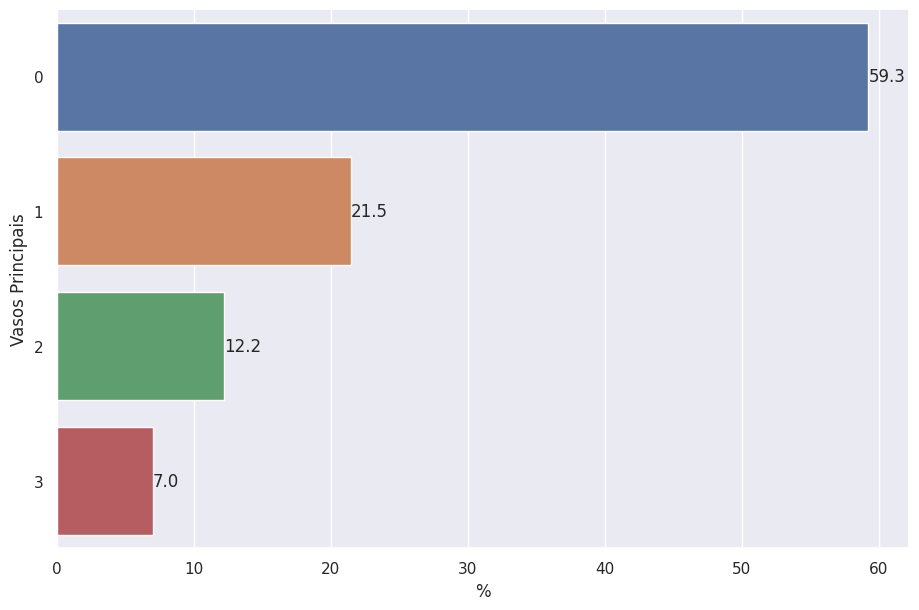

In [4]:
gp_vp = dados.groupby(by='vasos_principais').count().reset_index()
gp_vp = gp_vp[['vasos_principais','idade']]
gp_vp.columns = ['Vasos Principais', 'Quantidade']
gp_vp['%'] = (gp_vp['Quantidade']/gp_vp['Quantidade'].sum())*100
gp_vp = gp_vp.sort_values(by = '%', ascending = False)

sns.set(rc={'figure.figsize':(11,7)})


ax = sns.barplot(data = gp_vp, y = 'Vasos Principais', x = '%',orient='horizontal')
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.show()

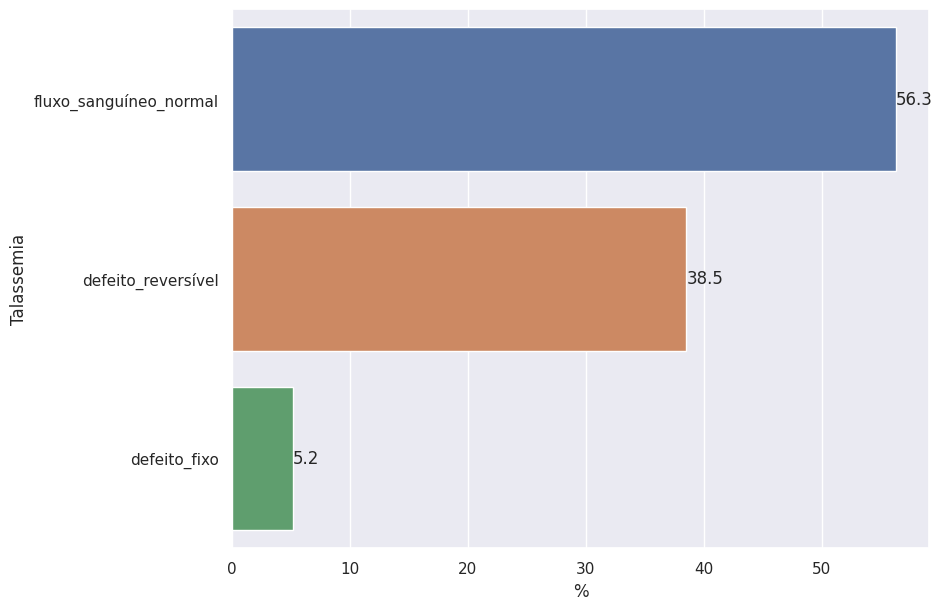

In [5]:
gp_tl = dados.groupby(by='talassemia').count().reset_index()
gp_tl = gp_tl[['talassemia','idade']]
gp_tl.columns = ['Talassemia', 'Quantidade']
gp_tl['%'] = (gp_tl['Quantidade']/gp_tl['Quantidade'].sum())*100
gp_tl = gp_tl.sort_values(by = '%', ascending = False)

sns.set(rc={'figure.figsize':(9,7)})


ax = sns.barplot(data = gp_tl, y = 'Talassemia', x = '%',orient='horizontal')
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.show()

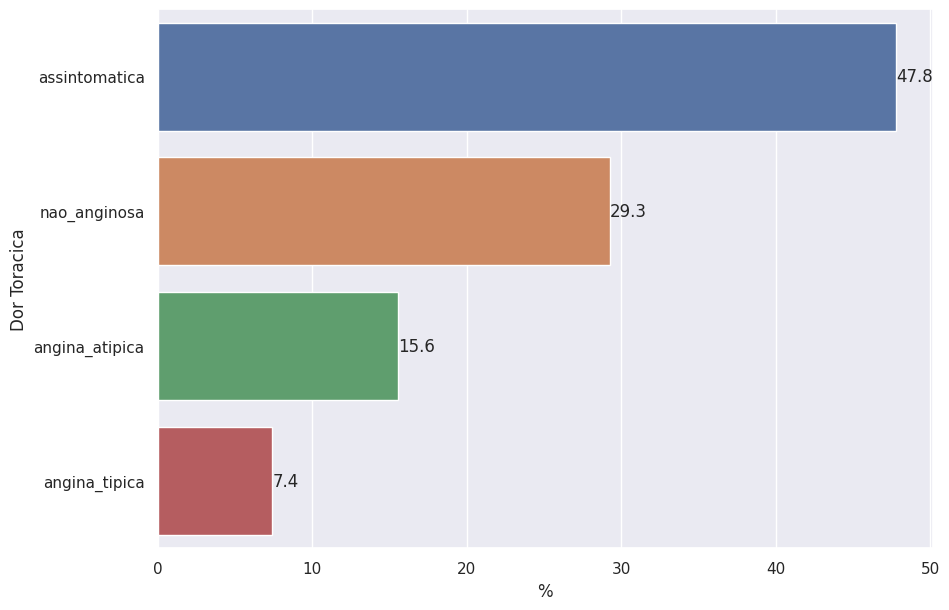

In [6]:
gp_dt = dados.groupby(by='dor_toracica').count().reset_index()
gp_dt = gp_dt[['dor_toracica','idade']]
gp_dt.columns = ['Dor Toracica', 'Quantidade']
gp_dt['%'] = (gp_dt['Quantidade']/gp_dt['Quantidade'].sum())*100
gp_dt = gp_dt.sort_values(by = '%', ascending = False)

sns.set(rc={'figure.figsize':(10,7)})


ax = sns.barplot(data = gp_dt, y = 'Dor Toracica', x = '%',orient='horizontal')
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.show()

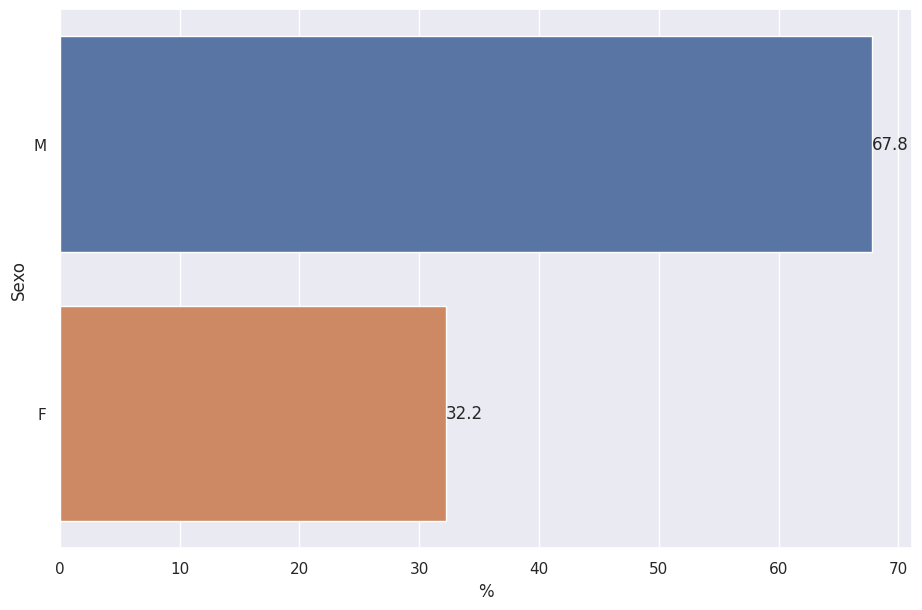

In [7]:
gp_sx = dados.groupby(by='sexo').count().reset_index()
gp_sx = gp_sx[['sexo','idade']]
gp_sx.columns = ['Sexo', 'Quantidade']
gp_sx['%'] = (gp_sx['Quantidade']/gp_sx['Quantidade'].sum())*100
gp_sx = gp_sx.sort_values(by = '%', ascending = False)

sns.set(rc={'figure.figsize':(11,7)})


ax = sns.barplot(data = gp_sx, y = 'Sexo', x = '%',orient='horizontal')
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.show()

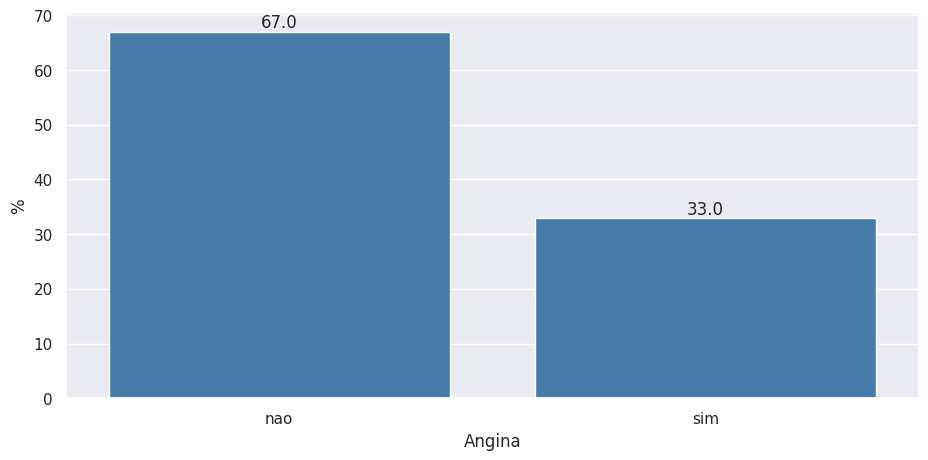

In [8]:
gp_ag = dados.groupby(by='angina').count().reset_index()
gp_ag = gp_ag[['angina','idade']]
gp_ag.columns = ['Angina', 'Quantidade']
gp_ag['%'] = (gp_ag['Quantidade']/gp_ag['Quantidade'].sum())*100
gp_ag = gp_ag.sort_values(by = '%', ascending = False)

sns.set(rc={'figure.figsize':(11,5)})


ax = sns.barplot(data = gp_ag, x = 'Angina', y = '%', color = '#377eb8')
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.show()

In [9]:
print('A base de dados contém {} registros \n'.format(dados.shape[0]))

A base de dados contém 270 registros 



In [10]:
dados.describe

<bound method NDFrame.describe of      idade sexo    dor_toracica  pressao_arterial  colesterol  \
0       70    M   assintomatica               130         322   
1       67    F    nao_anginosa               115         564   
2       57    M  angina_atipica               124         261   
3       64    M   assintomatica               128         263   
4       74    F  angina_atipica               120         269   
..     ...  ...             ...               ...         ...   
265     52    M    nao_anginosa               172         199   
266     44    M  angina_atipica               120         263   
267     56    F  angina_atipica               140         294   
268     57    M   assintomatica               140         192   
269     67    M   assintomatica               160         286   

     niveis_de_açucar eletrocardiograma  frequencia_cardiaca angina  \
0                   0       hipertrofia                  109    nao   
1                   0       hipertrofia    

In [11]:
dados.info

<bound method DataFrame.info of      idade sexo    dor_toracica  pressao_arterial  colesterol  \
0       70    M   assintomatica               130         322   
1       67    F    nao_anginosa               115         564   
2       57    M  angina_atipica               124         261   
3       64    M   assintomatica               128         263   
4       74    F  angina_atipica               120         269   
..     ...  ...             ...               ...         ...   
265     52    M    nao_anginosa               172         199   
266     44    M  angina_atipica               120         263   
267     56    F  angina_atipica               140         294   
268     57    M   assintomatica               140         192   
269     67    M   assintomatica               160         286   

     niveis_de_açucar eletrocardiograma  frequencia_cardiaca angina  \
0                   0       hipertrofia                  109    nao   
1                   0       hipertrofia      

In [12]:
dados.tail(10)

idade sexo    dor_toracica  pressao_arterial  colesterol  \
260     58    F    nao_anginosa               120         340   
261     60    M   assintomatica               130         206   
262     58    M  angina_atipica               120         284   
263     49    M  angina_atipica               130         266   
264     48    M  angina_atipica               110         229   
265     52    M    nao_anginosa               172         199   
266     44    M  angina_atipica               120         263   
267     56    F  angina_atipica               140         294   
268     57    M   assintomatica               140         192   
269     67    M   assintomatica               160         286   

     niveis_de_açucar eletrocardiograma  frequencia_cardiaca angina  \
260                 0            normal                  172    nao   
261                 0       hipertrofia                  132    sim   
262                 0       hipertrofia                  160    nao   
263                 0            normal                  171    nao   
264                 0            normal                  168    nao   
265                 1            normal                  162    nao   
266                 0            normal                  173    nao   
267                 0       hipertrofia                  153    nao   
268                 0            normal                  148    nao   
269                 0       hipertrofia                  108    sim   

     depressao_do_ST             segmento_ST  vasos_principais  \
260              0.0   inclinação_ascendente                 0   
261              2.4                   plano                 2   
262              1.8                   plano                 0   
263              0.6   inclinação_ascendente                 0   
264              1.0  inclinação_descendente                 0   
265              0.5   inclinação_ascendente                 0   
266              0.0   inclinação_ascendente                 0   
267              1.3                   plano                 0   
268              0.4                   plano                 0   
269              1.5                   plano                 3   

                 talassemia  alvo  
260  fluxo_sanguíneo_normal     0  
261      defeito_reversível     1  
262  fluxo_sanguíneo_normal     1  
263  fluxo_sanguíneo_normal     0  
264      defeito_reversível     1  
265      defeito_reversível     0  
266      defeito_reversível     0  
267  fluxo_sanguíneo_normal     0  
268            defeito_fixo     0  
269  fluxo_sanguíneo_normal     1

In [16]:
dados.phik_matrix()

interval columns not set, guessing: ['idade', 'pressao_arterial', 'colesterol', 'niveis_de_açucar', 'frequencia_cardiaca', 'depressao_do_ST', 'vasos_principais', 'alvo']


idade      sexo  dor_toracica  pressao_arterial  \
idade                1.000000  0.000000      0.168571          0.213439   
sexo                 0.000000  1.000000      0.161068          0.000000   
dor_toracica         0.168571  0.161068      1.000000          0.178020   
pressao_arterial     0.213439  0.000000      0.178020          1.000000   
colesterol           0.000000  0.322089      0.000000          0.115015   
niveis_de_açucar     0.000000  0.000000      0.185290          0.104336   
eletrocardiograma    0.418905  0.059929      0.096935          0.406485   
frequencia_cardiaca  0.512260  0.264119      0.304537          0.187307   
angina               0.086610  0.249811      0.614591          0.118156   
depressao_do_ST      0.000000  0.075310      0.348319          0.281209   
segmento_ST          0.000000  0.000000      0.186833          0.130095   
vasos_principais     0.339179  0.171738      0.348532          0.071771   
talassemia           0.234875  0.242846      0.232513          0.000000   
alvo                 0.340824  0.431186      0.698670          0.046521   

                     colesterol  niveis_de_açucar  eletrocardiograma  \
idade                  0.000000          0.000000           0.418905   
sexo                   0.322089          0.000000           0.059929   
dor_toracica           0.000000          0.185290           0.096935   
pressao_arterial       0.115015          0.104336           0.406485   
colesterol             1.000000          0.000000           0.140331   
niveis_de_açucar       0.000000          1.000000           0.000000   
eletrocardiograma      0.140331          0.000000           1.000000   
frequencia_cardiaca    0.000000          0.000000           0.281759   
angina                 0.000000          0.000000           0.030993   
depressao_do_ST        0.237644          0.000000           0.205002   
segmento_ST            0.000000          0.073705           0.301931   
vasos_principais       0.130740          0.100377           0.000000   
talassemia             0.000000          0.000000           0.000000   
alvo                   0.174416          0.000000           0.097444   

                     frequencia_cardiaca    angina  depressao_do_ST  \
idade                           0.512260  0.086610         0.000000   
sexo                            0.264119  0.249811         0.075310   
dor_toracica                    0.304537  0.614591         0.348319   
pressao_arterial                0.187307  0.118156         0.281209   
colesterol                      0.000000  0.000000         0.237644   
niveis_de_açucar                0.000000  0.000000         0.000000   
eletrocardiograma               0.281759  0.030993         0.205002   
frequencia_cardiaca             1.000000  0.482246         0.311457   
angina                          0.482246  1.000000         0.331943   
depressao_do_ST                 0.311457  0.331943         1.000000   
segmento_ST                     0.443419  0.163352         0.596741   
vasos_principais                0.288142  0.274361         0.385337   
talassemia                      0.324501  0.189224         0.387747   
alvo                            0.519382  0.597405         0.551728   

                     segmento_ST  vasos_principais  talassemia      alvo  
idade                   0.000000          0.339179    0.234875  0.340824  
sexo                    0.000000          0.171738    0.242846  0.431186  
dor_toracica            0.186833          0.348532    0.232513  0.698670  
pressao_arterial        0.130095          0.071771    0.000000  0.046521  
colesterol              0.000000          0.130740    0.000000  0.174416  
niveis_de_açucar        0.073705          0.100377    0.000000  0.000000  
eletrocardiograma       0.301931          0.000000    0.000000  0.097444  
frequencia_cardiaca     0.443419          0.288142    0.324501  0.519382  
angina                  0.163352          0.274361    0.189224  0.597405  
d

In [17]:
phik_overview = dados.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['idade', 'pressao_arterial', 'colesterol', 'niveis_de_açucar', 'frequencia_cardiaca', 'depressao_do_ST', 'vasos_principais', 'alvo']


idade  sexo  dor_toracica  pressao_arterial  colesterol  \
idade                 1.00  0.00          0.17              0.21        0.00   
sexo                  0.00  1.00          0.16              0.00        0.32   
dor_toracica          0.17  0.16          1.00              0.18        0.00   
pressao_arterial      0.21  0.00          0.18              1.00        0.12   
colesterol            0.00  0.32          0.00              0.12        1.00   
niveis_de_açucar      0.00  0.00          0.19              0.10        0.00   
eletrocardiograma     0.42  0.06          0.10              0.41        0.14   
frequencia_cardiaca   0.51  0.26          0.30              0.19        0.00   
angina                0.09  0.25          0.61              0.12        0.00   
depressao_do_ST       0.00  0.08          0.35              0.28        0.24   
segmento_ST           0.00  0.00          0.19              0.13        0.00   
vasos_principais      0.34  0.17          0.35              0.07        0.13   
talassemia            0.23  0.24          0.23              0.00        0.00   
alvo                  0.34  0.43          0.70              0.05        0.17   

                     niveis_de_açucar  eletrocardiograma  frequencia_cardiaca  \
idade                            0.00               0.42                 0.51   
sexo                             0.00               0.06                 0.26   
dor_toracica                     0.19               0.10                 0.30   
pressao_arterial                 0.10               0.41                 0.19   
colesterol                       0.00               0.14                 0.00   
niveis_de_açucar                 1.00               0.00                 0.00   
eletrocardiograma                0.00               1.00                 0.28   
frequencia_cardiaca              0.00               0.28                 1.00   
angina                           0.00               0.03                 0.48   
depressao_do_ST                  0.00               0.21                 0.31   
segmento_ST                      0.07               0.30                 0.44   
vasos_principais                 0.10               0.00                 0.29   
talassemia                       0.00               0.00                 0.32   
alvo                             0.00               0.10                 0.52   

                     angina  depressao_do_ST  segmento_ST  vasos_principais  \
idade                  0.09             0.00         0.00              0.34   
sexo                   0.25             0.08         0.00              0.17   
dor_toracica           0.61             0.35         0.19              0.35   
pressao_arterial       0.12             0.28         0.13              0.07   
colesterol             0.00             0.24         0.00              0.13   
niveis_de_açucar       0.00             0.00         0.07              0.10   
eletrocardiograma      0.03             0.21         0.30              0.00   
frequencia_cardiaca    0.48             0.31         0.44              0.29   
angina                 1.00             0.33         0.16              0.27   
depressao_do_ST        0.33             1.00         0.60              0.39   
segmento_ST            0.16             0.60         1.00              0.10   
vasos_principais       0.27             0.39         0.10              1.00   
talassemia             0.19             0.39         0.52              0.17   
alvo                   0.60             0.55         0.23              0.67   

                     talassemia  alvo  
idade                      0.23  0.34  
sexo                       0.24  0.43  
dor_toracica               0.23  0.70  
pressao_arterial           0.00  0.05  
colesterol                 0.00  0.17  
niveis_de_açucar           0.00  0.00  
eletrocardiograma          0.00  0.10  
frequencia_cardiaca        0.32  0.52  
angina                     0.19  0.60  
depressao_do_ST   

In [18]:
dados.columns

Index(['idade', 'sexo', 'dor_toracica', 'pressao_arterial', 'colesterol',
       'niveis_de_açucar', 'eletrocardiograma', 'frequencia_cardiaca',
       'angina', 'depressao_do_ST', 'segmento_ST', 'vasos_principais',
       'talassemia', 'alvo'],
      dtype='object')

In [19]:
interval_cols = ['idade', 'pressao_arterial', 'colesterol', 'niveis_de_açucar', 'frequencia_cardiaca', 'depressao_do_ST', 'vasos_principais', 'alvo']
phik_overview = dados.phik_matrix(interval_cols=interval_cols)

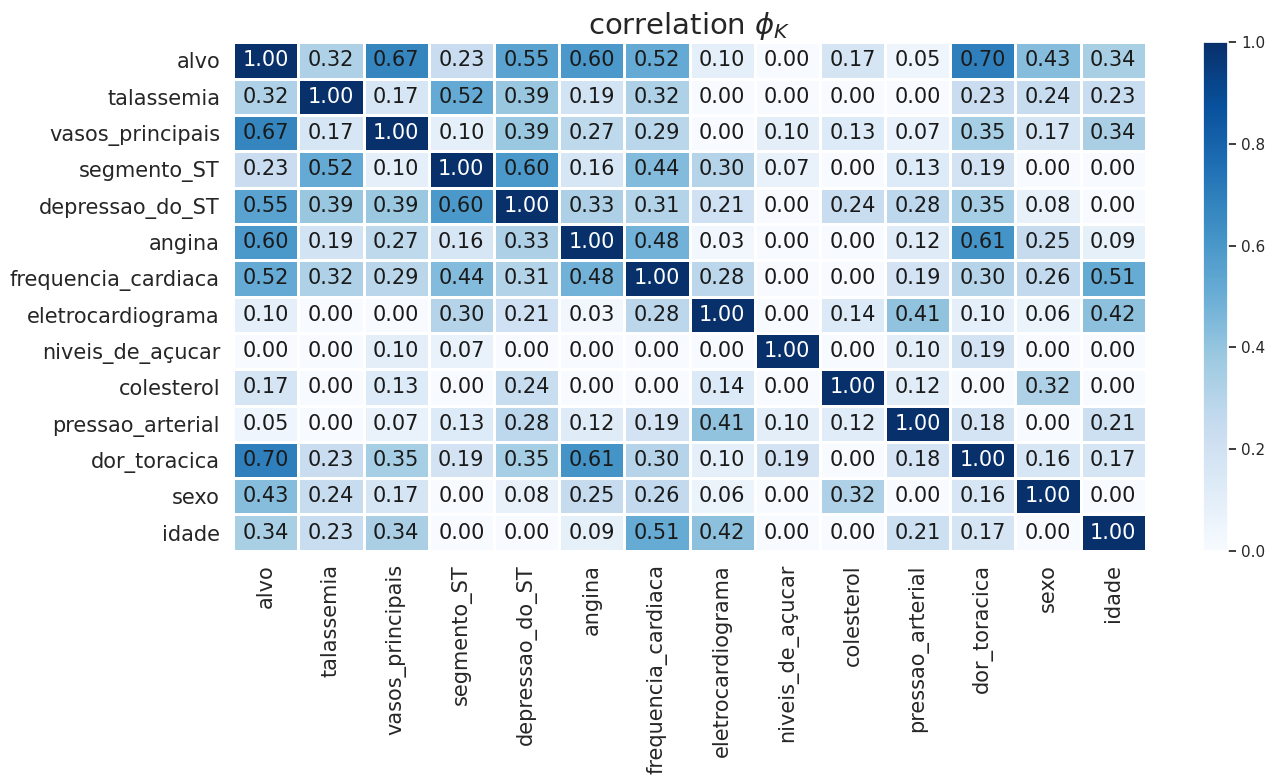

In [20]:
plot_correlation_matrix(phik_overview.values,     # Observando os resultados no formato de um heatmap
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Blues", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(14, 8))
plt.tight_layout()

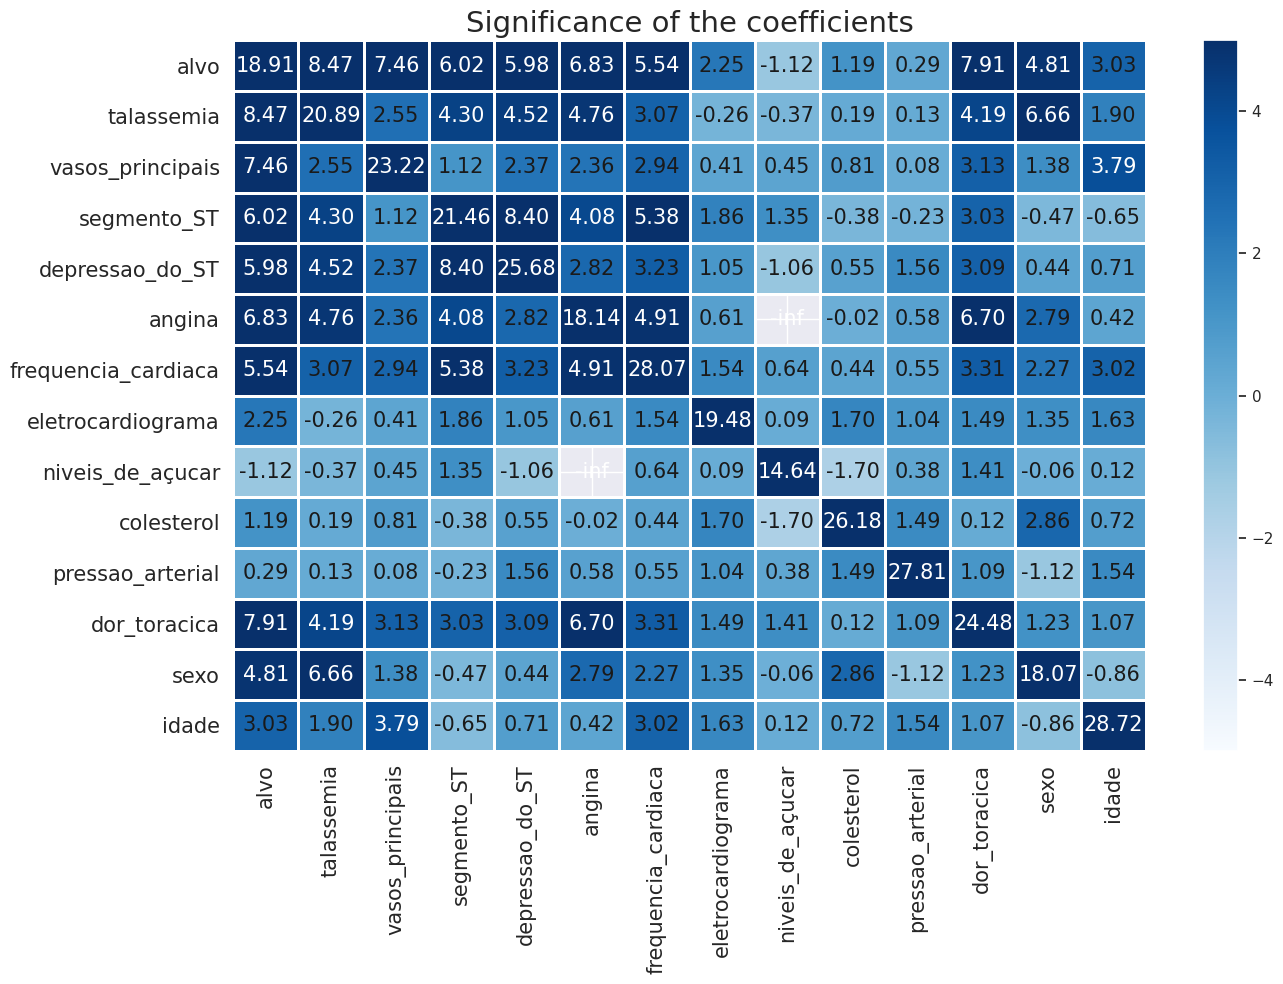

In [21]:
significance_overview = dados.significance_matrix(interval_cols=interval_cols)   # Observando a significância estatística das variáveis
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        color_map = 'Blues',
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1.5, figsize=(14, 10))
plt.tight_layout()

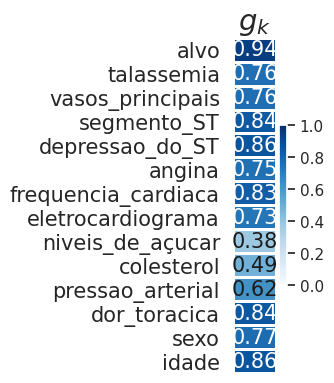

In [22]:
global_correlation, global_labels = dados.global_phik(interval_cols=interval_cols)

plot_correlation_matrix(global_correlation, 
                        x_labels=[''], y_labels=global_labels, 
                        vmin=0, vmax=1, figsize=(3.5,4),
                        color_map="Blues", title=r"$g_k$",
                        fontsize_factor=1.5)
plt.tight_layout()

interval columns not set, guessing: ['idade', 'pressao_arterial', 'colesterol', 'niveis_de_açucar', 'frequencia_cardiaca', 'depressao_do_ST', 'vasos_principais', 'alvo']


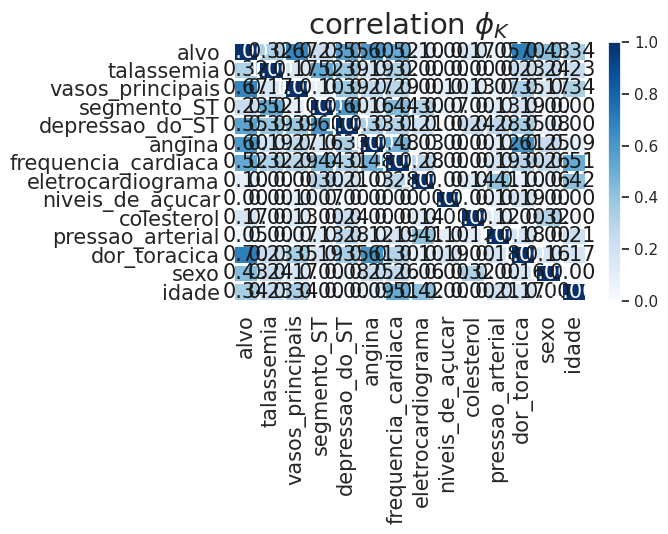

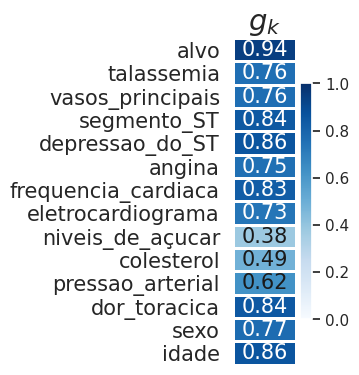

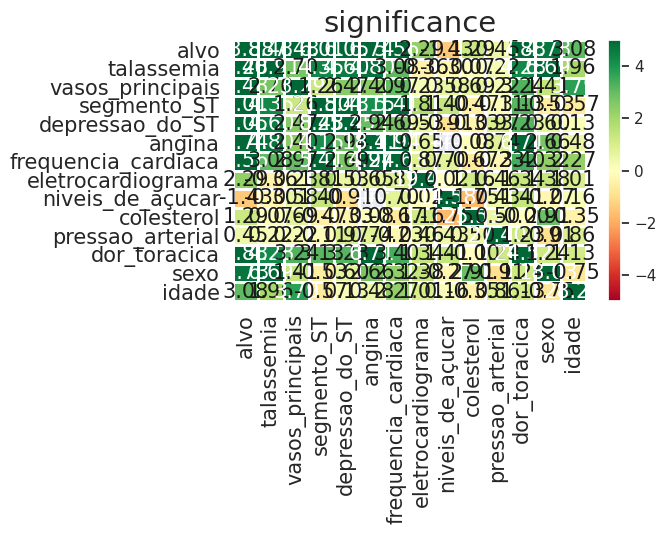

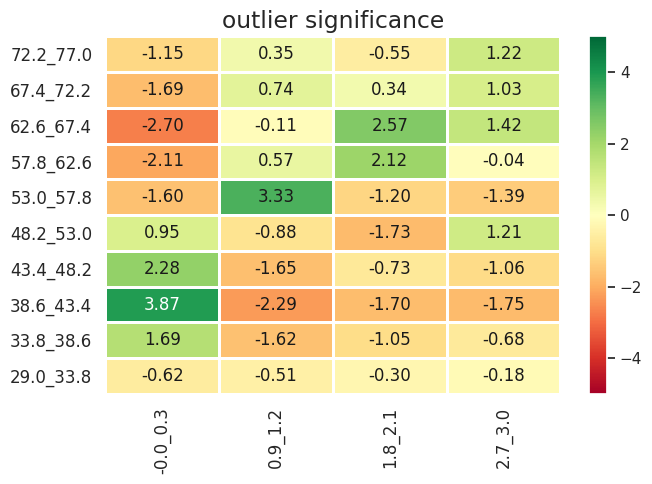

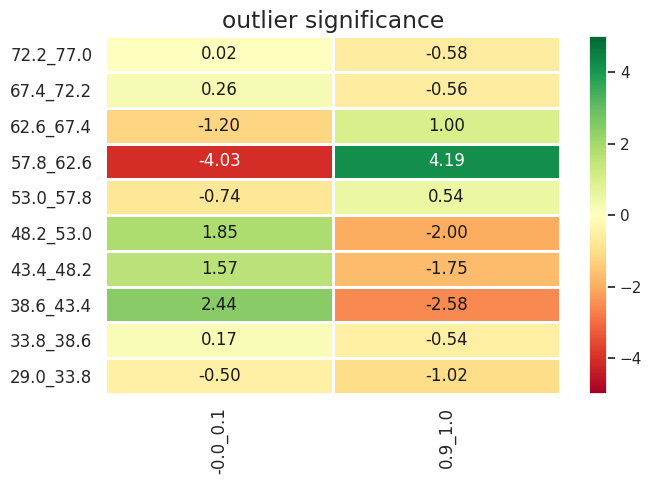

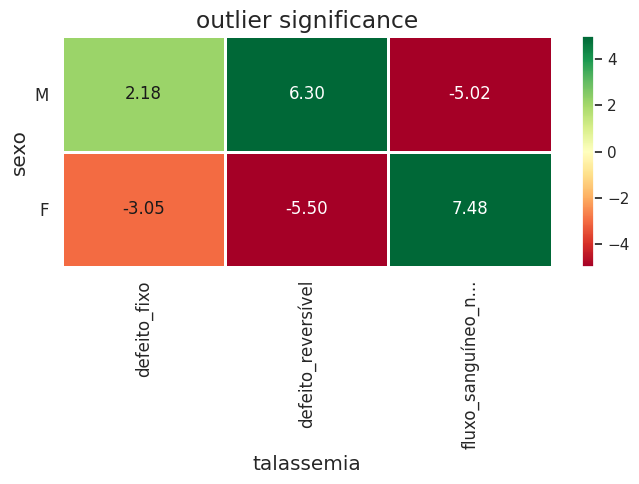

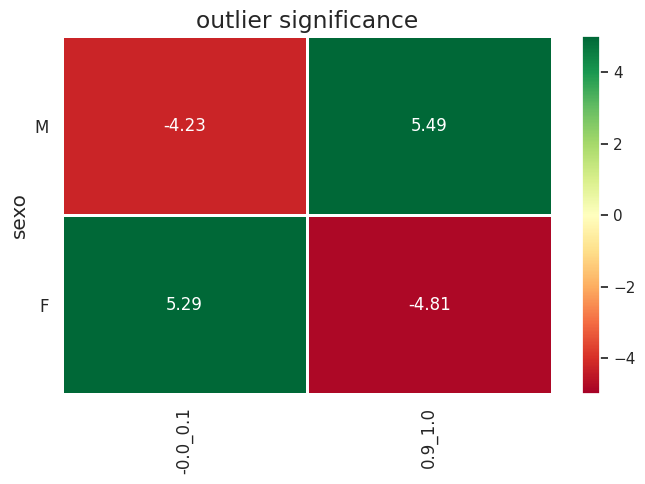

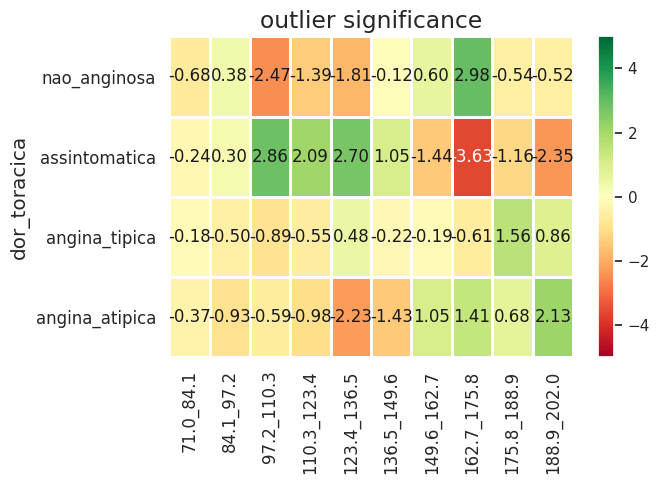

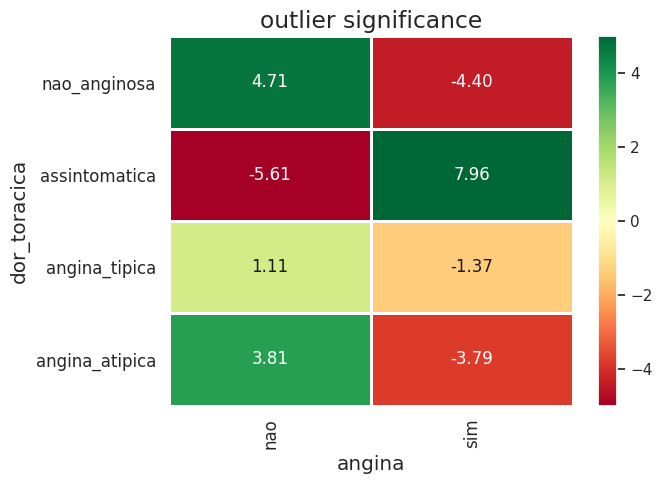

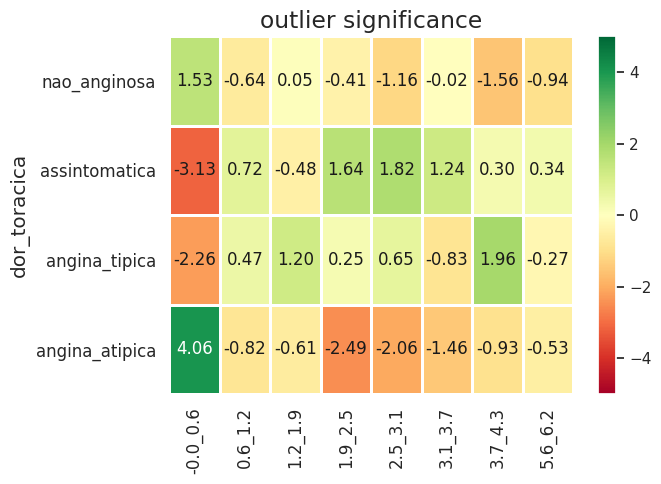

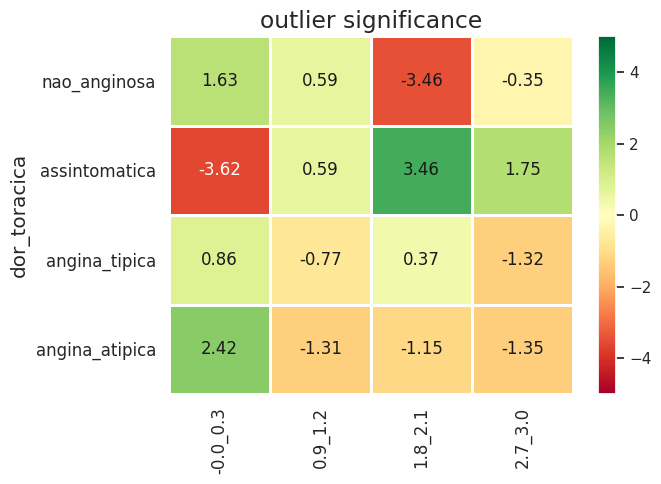

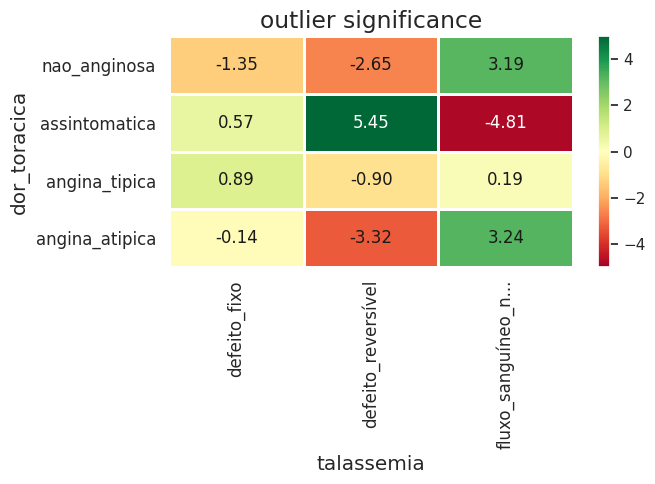

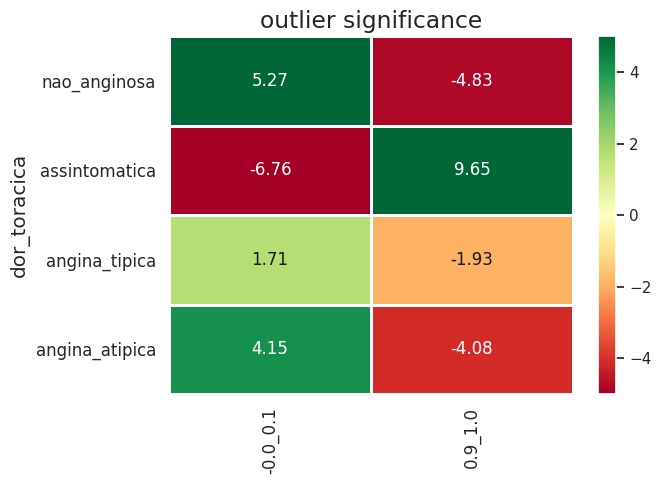

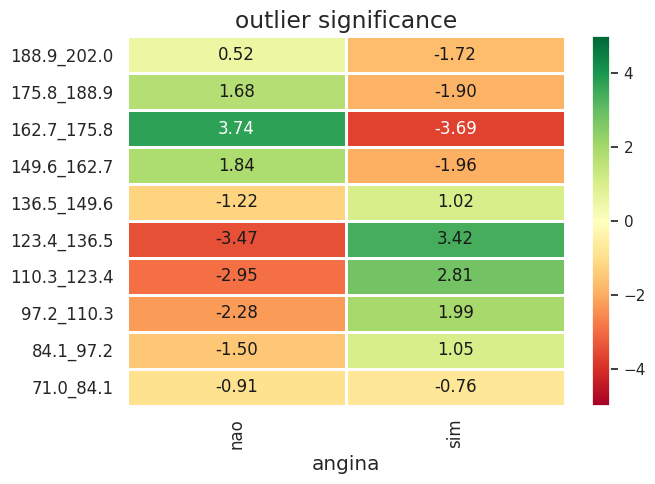

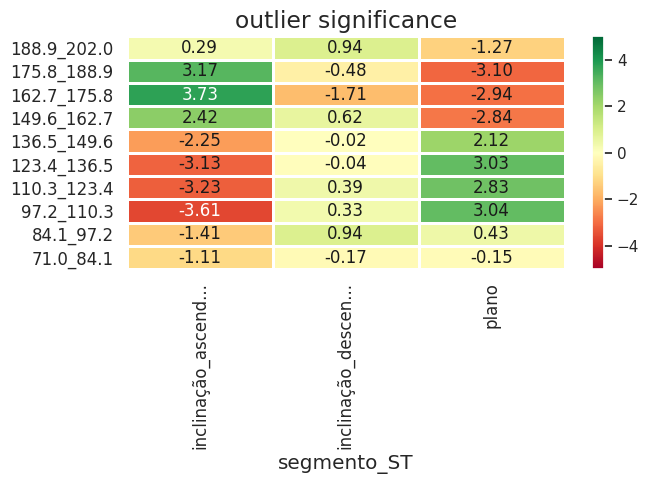

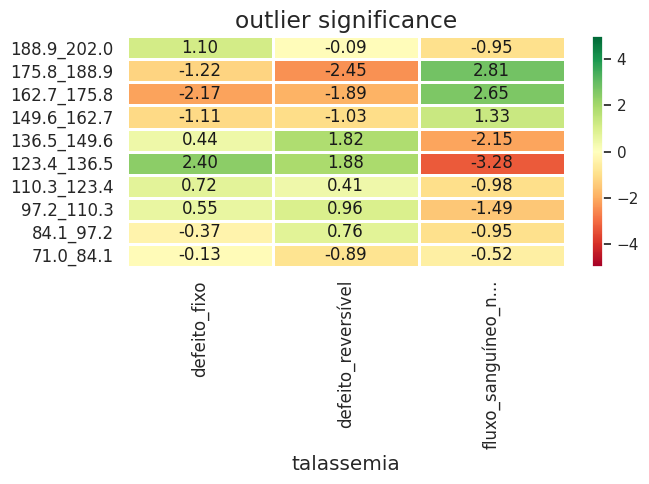

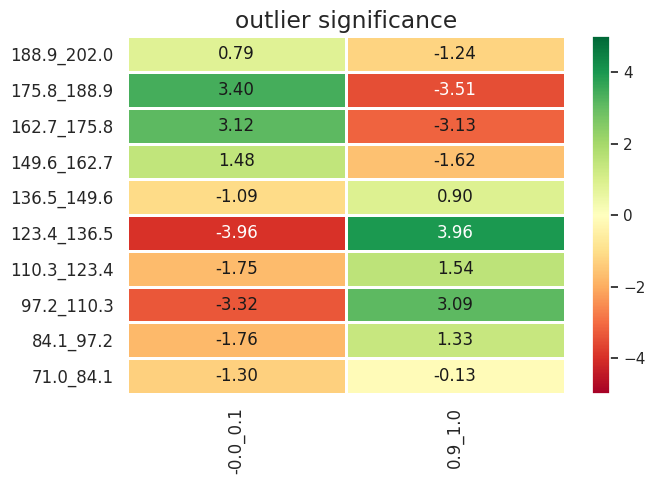

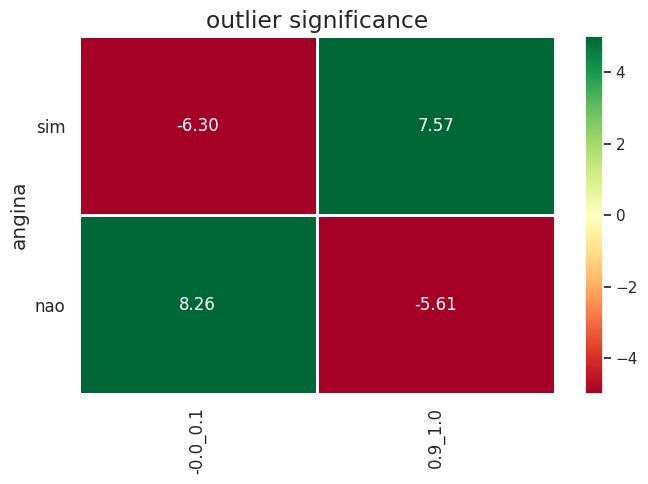

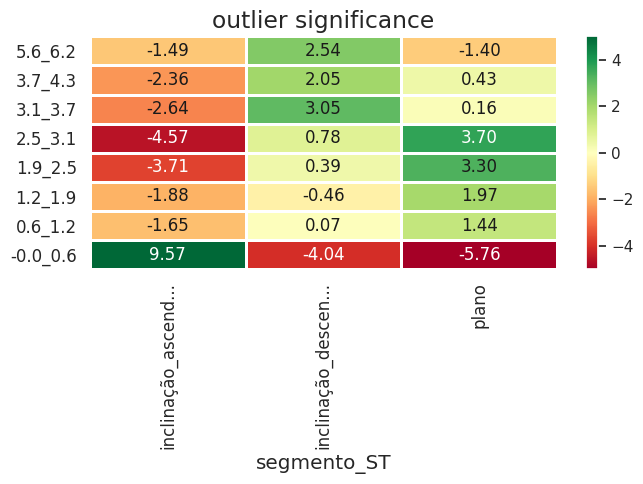

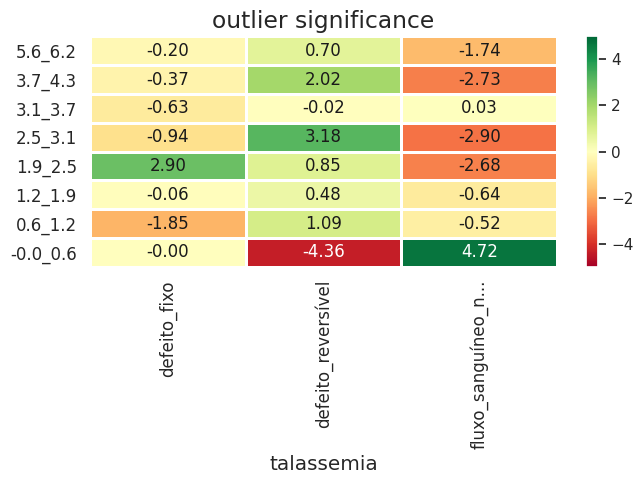

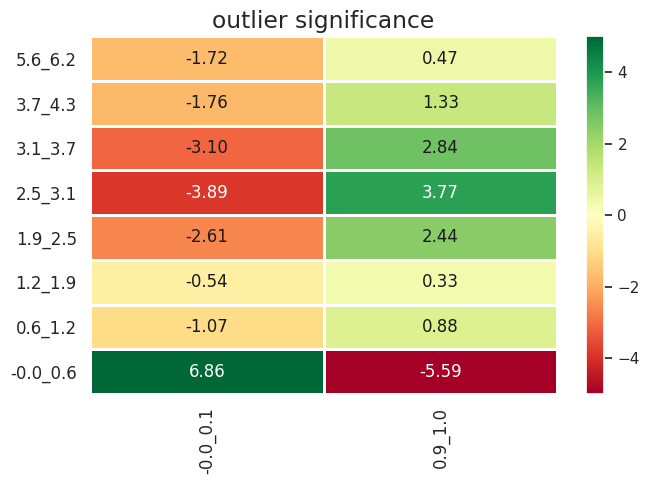

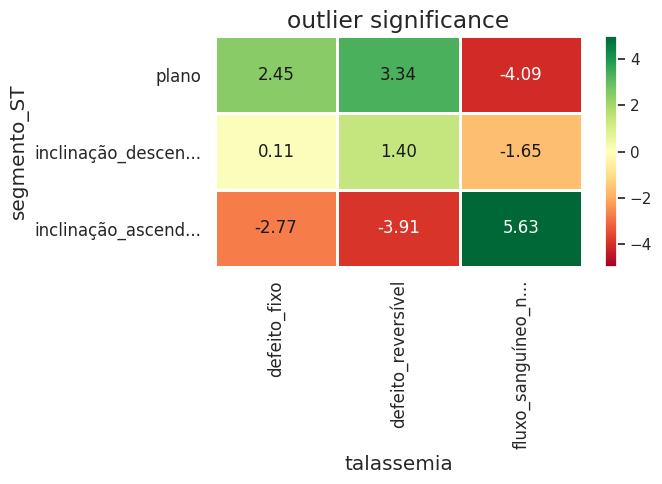

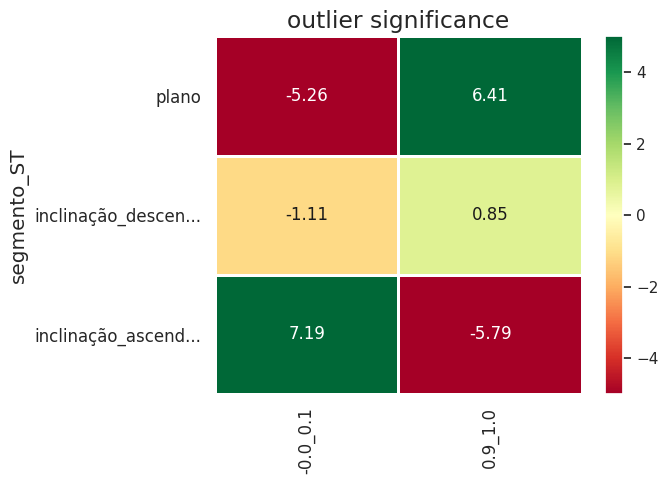

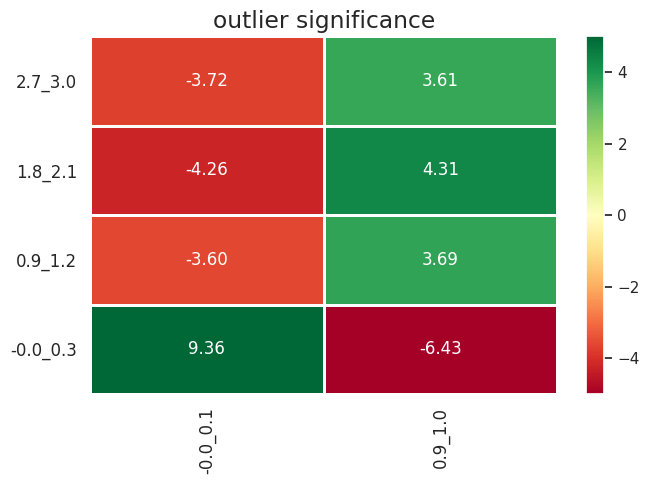

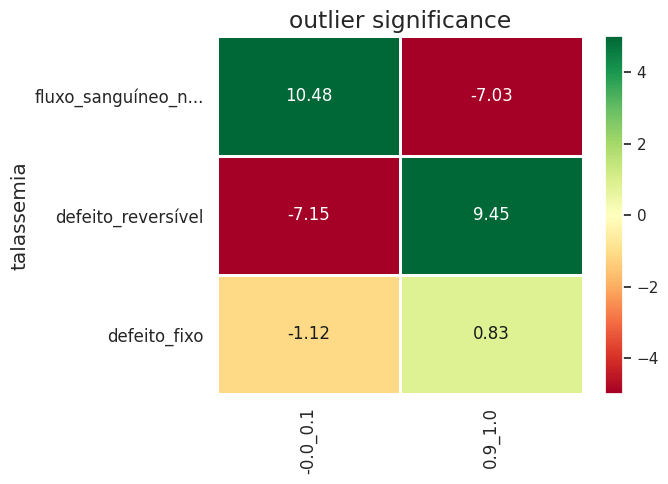

In [23]:
rep = report.correlation_report(dados, significance_threshold=3, correlation_threshold=0.2, pdf_file_name='rep.pdf')

interval columns not set, guessing: ['idade', 'pressao_arterial', 'colesterol', 'niveis_de_açucar', 'frequencia_cardiaca', 'depressao_do_ST', 'vasos_principais', 'alvo']


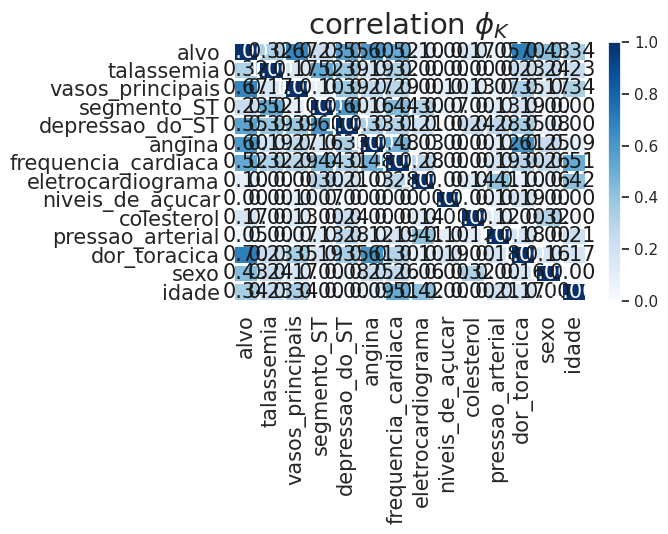

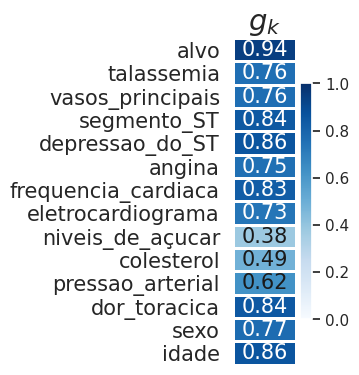

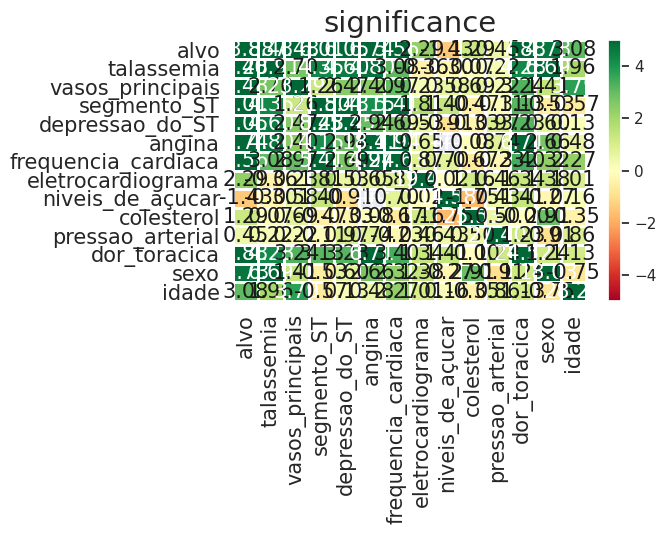

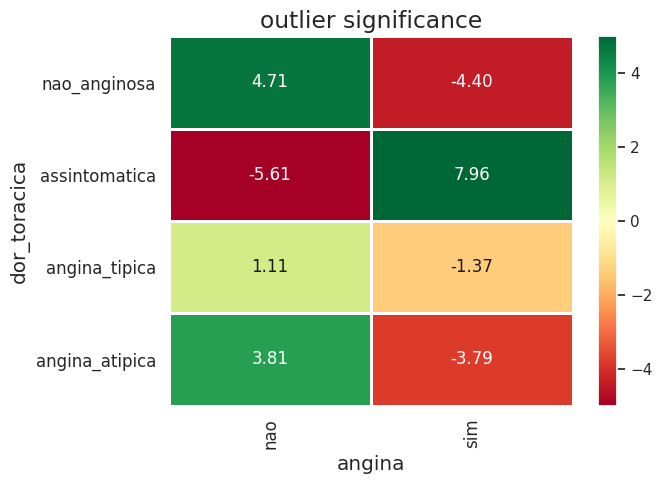

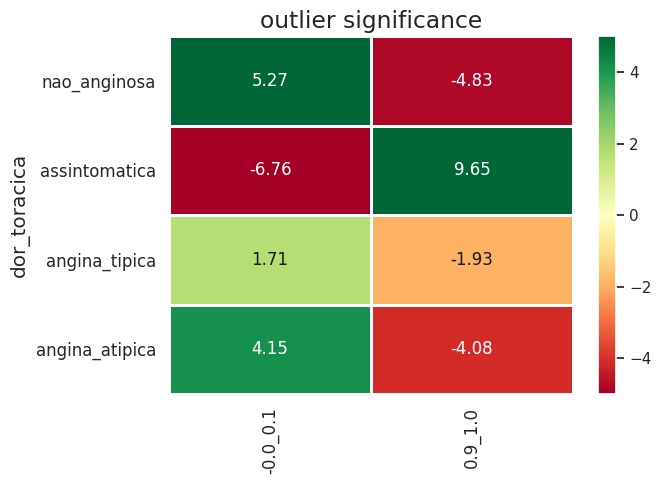

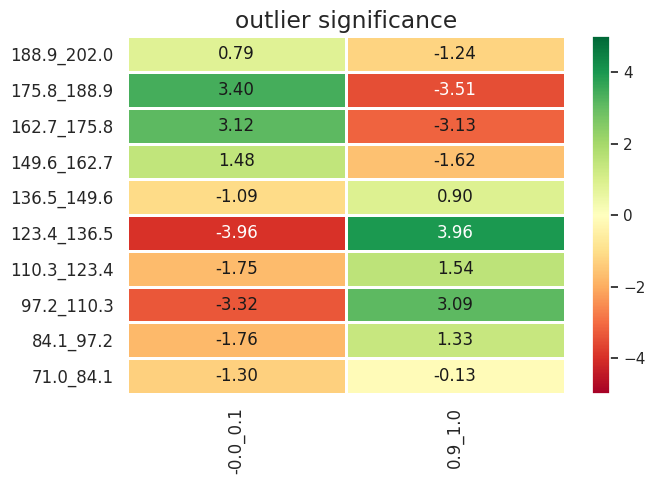

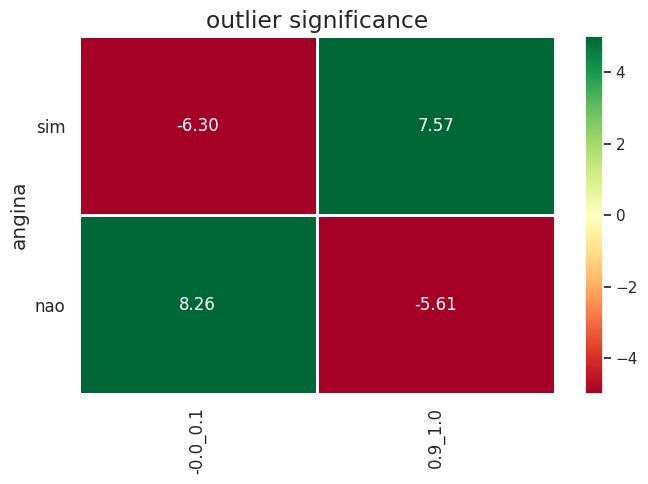

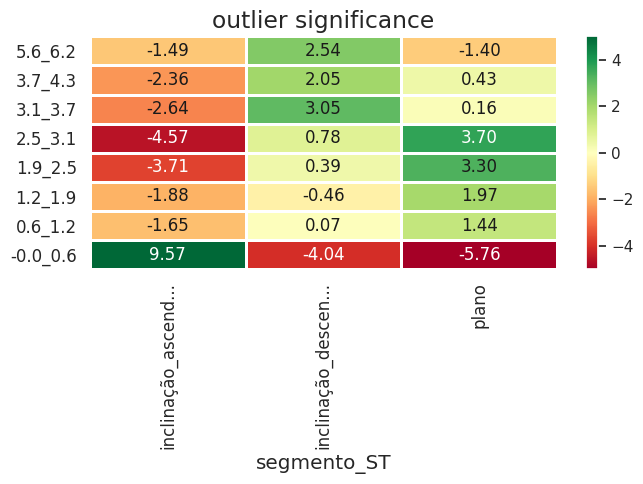

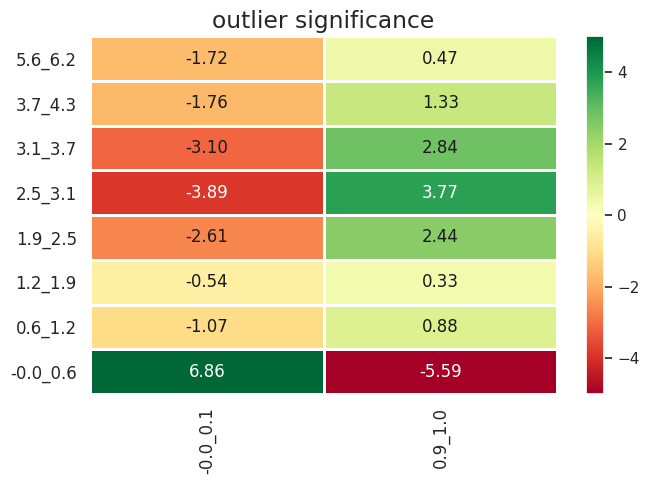

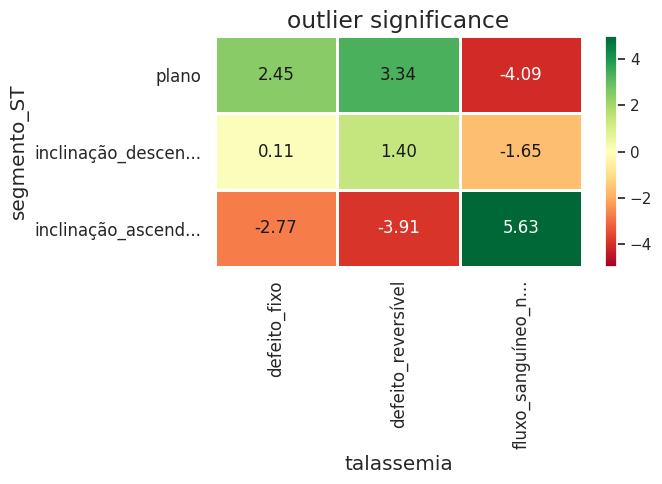

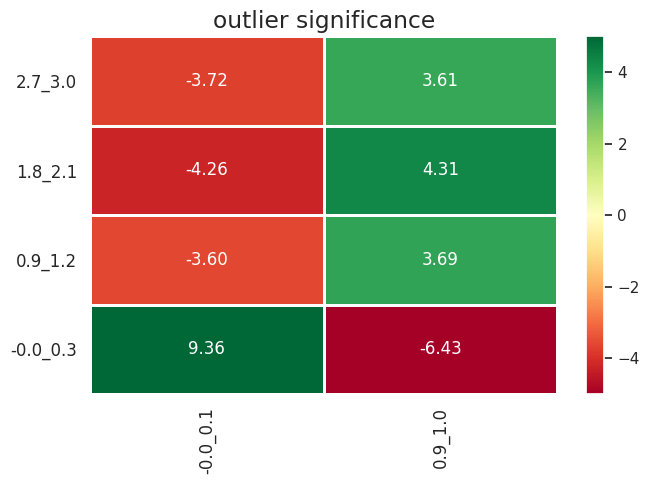

(                        idade      sexo  dor_toracica  pressao_arterial  \
 idade                1.000000  0.000000      0.168571          0.213439   
 sexo                 0.000000  1.000000      0.161068          0.000000   
 dor_toracica         0.168571  0.161068      1.000000          0.178020   
 pressao_arterial     0.213439  0.000000      0.178020          1.000000   
 colesterol           0.000000  0.322089      0.000000          0.115015   
 niveis_de_açucar     0.000000  0.000000      0.185290          0.104336   
 eletrocardiograma    0.418905  0.059929      0.096935          0.406485   
 frequencia_cardiaca  0.512260  0.264119      0.304537          0.187307   
 angina               0.086610  0.249811      0.614591          0.118156   
 depressao_do_ST      0.000000  0.075310      0.348319          0.281209   
 segmento_ST          0.000000  0.000000      0.186833          0.130095   
 vasos_principais     0.339179  0.171738      0.348532          0.071771   
 talassemia 

In [24]:
report.correlation_report(dados, pdf_file_name='test.pdf')

In [25]:
dados.columns

Index(['idade', 'sexo', 'dor_toracica', 'pressao_arterial', 'colesterol',
       'niveis_de_açucar', 'eletrocardiograma', 'frequencia_cardiaca',
       'angina', 'depressao_do_ST', 'segmento_ST', 'vasos_principais',
       'talassemia', 'alvo'],
      dtype='object')

interval columns not set, guessing: ['alvo']


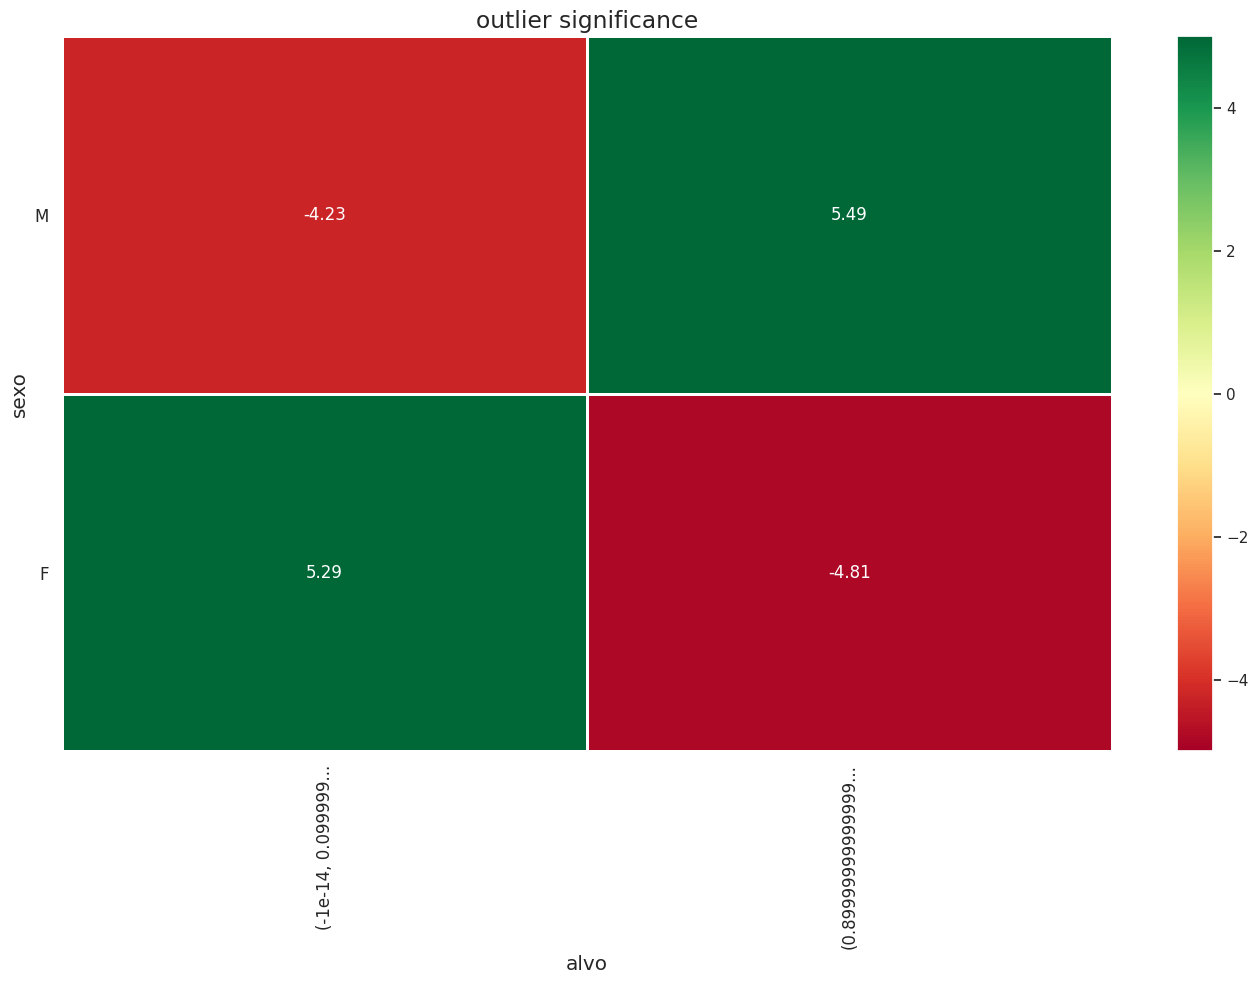

In [26]:
var_1 = "sexo"
var_2 = "alvo"

outlier_signifs, binning_dict = dados[[var_1,var_2]].outlier_significance_matrix(retbins=True)

zvalues = outlier_signifs.values
xlabels = binning_dict[var_2] if var_2 in binning_dict.keys() else outlier_signifs.columns
ylabels = binning_dict[var_1] if var_1 in binning_dict.keys() else outlier_signifs.index

plot_correlation_matrix(zvalues, x_labels=xlabels, y_labels=ylabels, 
                        x_label=var_2,y_label=var_1,
                        vmin=-5, vmax=5, title="outlier significance",
                        identity_layout=False, fontsize_factor=1.2, 
                        figsize=(14, 10))

interval columns not set, guessing: ['idade', 'alvo']


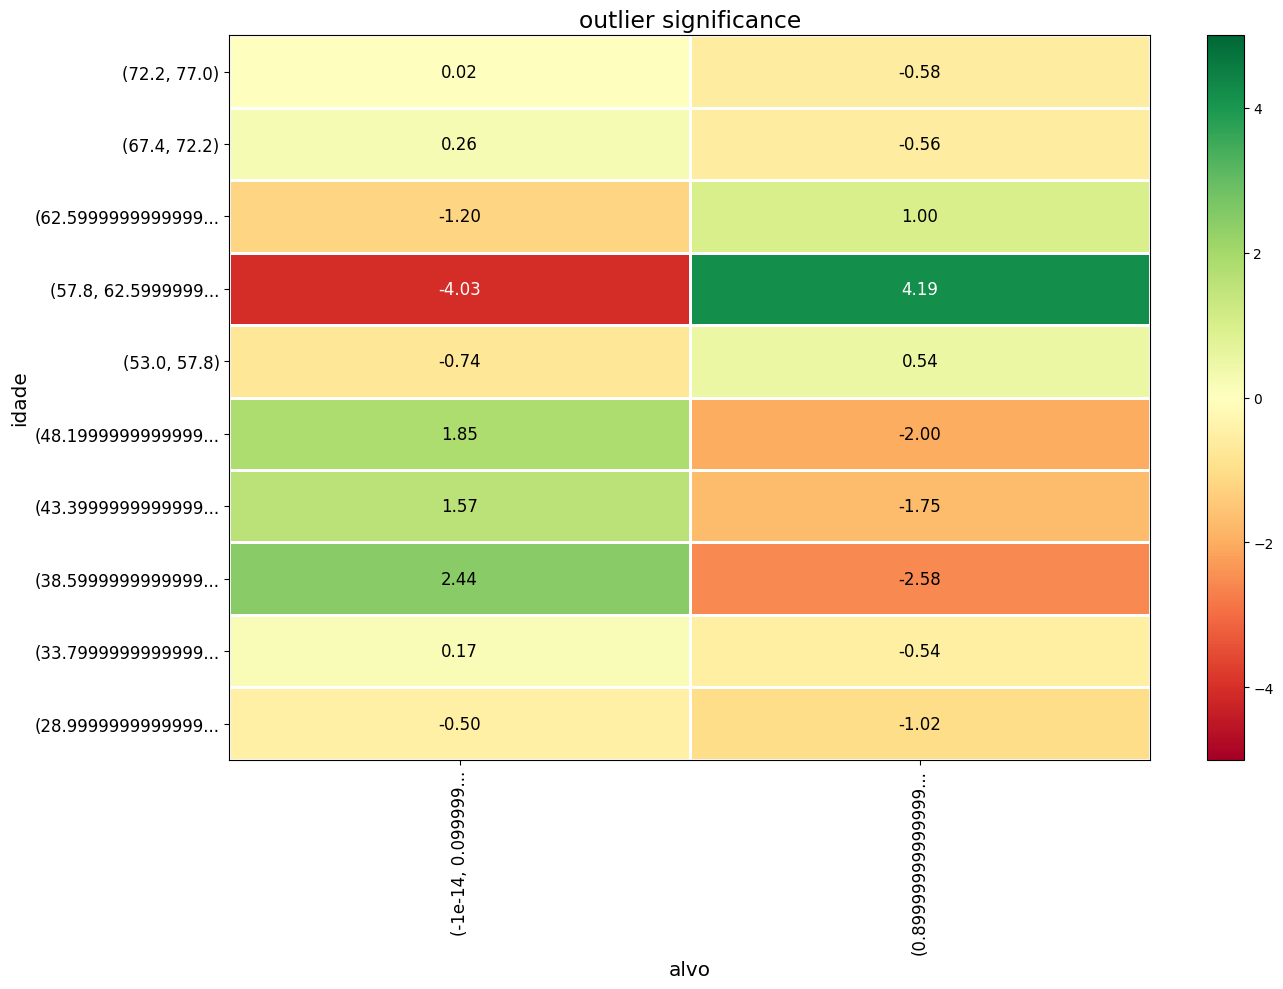

In [ ]:
var_1 = "idade"
var_2 = "alvo"

outlier_signifs, binning_dict = dados[[var_1,var_2]].outlier_significance_matrix(retbins=True)

zvalues = outlier_signifs.values
xlabels = binning_dict[var_2] if var_2 in binning_dict.keys() else outlier_signifs.columns
ylabels = binning_dict[var_1] if var_1 in binning_dict.keys() else outlier_signifs.index

plot_correlation_matrix(zvalues, x_labels=xlabels, y_labels=ylabels, 
                        x_label=var_2,y_label=var_1,
                        vmin=-5, vmax=5, title="outlier significance",
                        identity_layout=False, fontsize_factor=1.2, 
                        figsize=(14, 10))

interval columns not set, guessing: ['alvo']


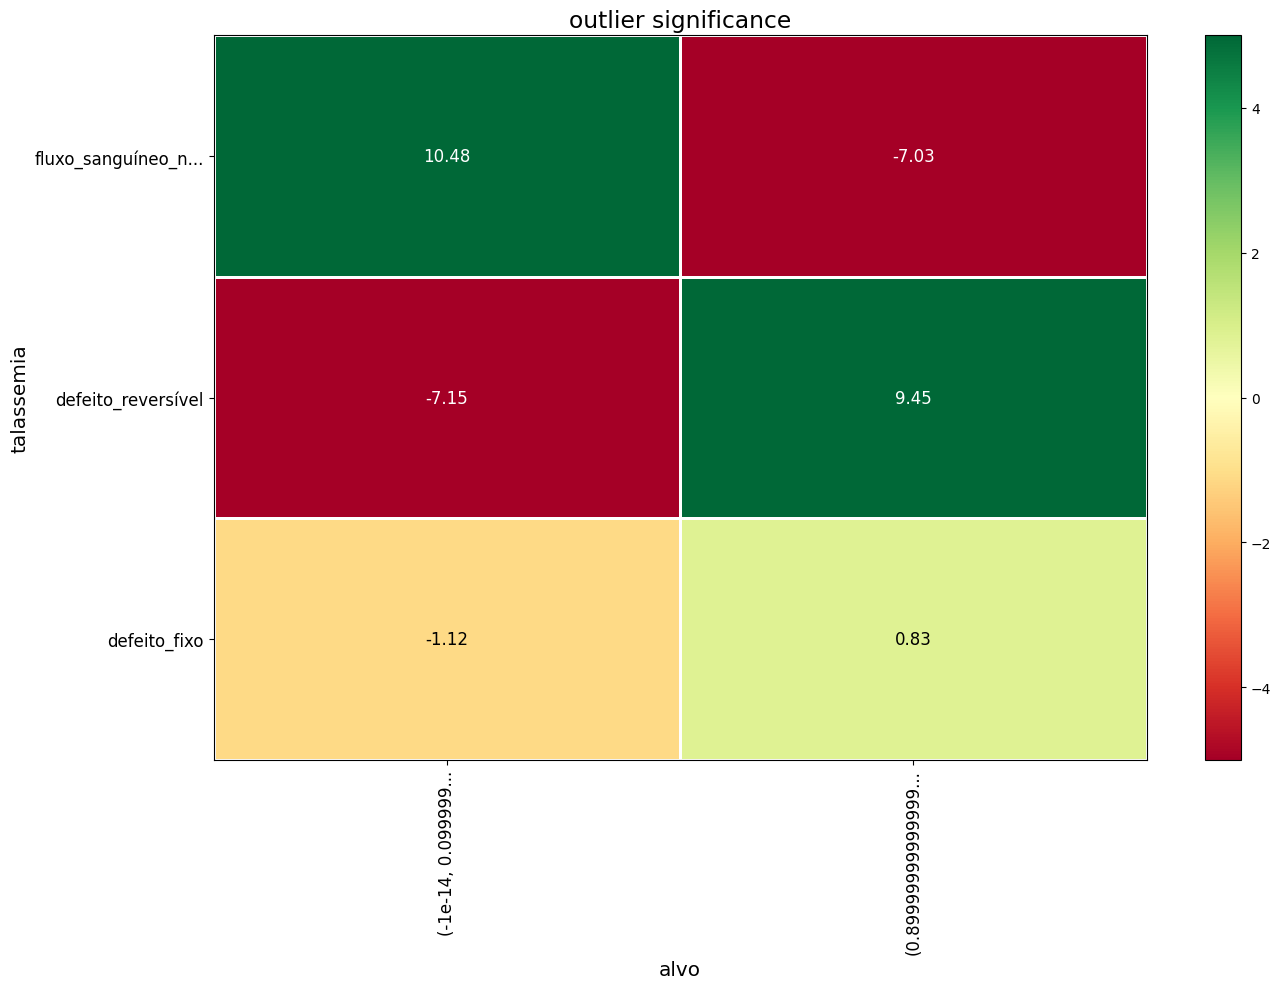

In [ ]:
var_1 = "talassemia"
var_2 = "alvo"

outlier_signifs, binning_dict = dados[[var_1,var_2]].outlier_significance_matrix(retbins=True)

zvalues = outlier_signifs.values
xlabels = binning_dict[var_2] if var_2 in binning_dict.keys() else outlier_signifs.columns
ylabels = binning_dict[var_1] if var_1 in binning_dict.keys() else outlier_signifs.index

plot_correlation_matrix(zvalues, x_labels=xlabels, y_labels=ylabels, 
                        x_label=var_2,y_label=var_1,
                        vmin=-5, vmax=5, title="outlier significance",
                        identity_layout=False, fontsize_factor=1.2, 
                        figsize=(14, 10))

In [ ]:
profile = ProfileReport(dados, title="Profiling Report")

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("seu_relatorio.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [68]:
dados_numeric = dados.select_dtypes(include='number')
dados_numeric.columns

Index(['idade', 'pressao_arterial', 'colesterol', 'niveis_de_açucar',
       'frequencia_cardiaca', 'depressao_do_ST', 'vasos_principais', 'alvo',
       'F', 'M', 'angina_atipica', 'angina_tipica', 'assintomatica',
       'nao_anginosa', 'anormalidade', 'hipertrofia', 'normal', 'nao', 'sim',
       'inclinação_ascendente', 'inclinação_descendente', 'plano',
       'defeito_fixo', 'defeito_reversível', 'fluxo_sanguíneo_normal'],
      dtype='object')

In [27]:
# selecionando as colunas categóricas
colunas_categoricas = []
colunas_categoricas = dados.select_dtypes(include=['object']).columns.tolist()

# exibindo as colunas categóricas
print(colunas_categoricas)

['sexo', 'dor_toracica', 'eletrocardiograma', 'angina', 'segmento_ST', 'talassemia']


In [28]:
# dados categóricos para dados numéricos3

frequencia = []
for coluna in colunas_categoricas:
    frequencia.extend(['Coluna Analisada: {}'.format(coluna), dados[coluna].value_counts()])
for i in range(len(frequencia)):
  print(frequencia[i])
  print()

Coluna Analisada: sexo

M    183
F     87
Name: sexo, dtype: int64

Coluna Analisada: dor_toracica

assintomatica     129
nao_anginosa       79
angina_atipica     42
angina_tipica      20
Name: dor_toracica, dtype: int64

Coluna Analisada: eletrocardiograma

hipertrofia     137
normal          131
anormalidade      2
Name: eletrocardiograma, dtype: int64

Coluna Analisada: angina

nao    181
sim     89
Name: angina, dtype: int64

Coluna Analisada: segmento_ST

inclinação_ascendente     130
plano                     122
inclinação_descendente     18
Name: segmento_ST, dtype: int64

Coluna Analisada: talassemia

fluxo_sanguíneo_normal    152
defeito_reversível        104
defeito_fixo               14
Name: talassemia, dtype: int64



In [29]:
# aplicar a codificação one-hot usando a função get_dummies do pandas
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(dados[['sexo','dor_toracica','eletrocardiograma', 'angina', 'segmento_ST', 'talassemia']]).toarray())
enc_df.columns = np.hstack(enc.categories_)
enc_df

# concatenar o DataFrame original com o DataFrame codificado
dados_encoded = pd.concat([dados, enc_df], axis=1)
dados_encoded.head(2)

idade sexo   dor_toracica  pressao_arterial  colesterol  niveis_de_açucar  \
0     70    M  assintomatica               130         322                 0   
1     67    F   nao_anginosa               115         564                 0   

  eletrocardiograma  frequencia_cardiaca angina  depressao_do_ST  ...  \
0       hipertrofia                  109    nao              2.4  ...   
1       hipertrofia                  160    nao              1.6  ...   

  hipertrofia  normal  nao  sim  inclinação_ascendente  \
0         1.0     0.0  1.0  0.0                    0.0   
1         1.0     0.0  1.0  0.0                    0.0   

   inclinação_descendente  plano  defeito_fixo  defeito_reversível  \
0                     0.0    1.0           0.0                 0.0   
1                     0.0    1.0           0.0                 1.0   

   fluxo_sanguíneo_normal  
0                     1.0  
1                     0.0  

[2 rows x 31 columns]

In [32]:
dados_1 = dados.join(enc_df)
dados_1 = dados_1.drop(['sexo','dor_toracica','eletrocardiograma', 'angina', 'segmento_ST', 'talassemia'] , axis = 1)
dados_1

idade  pressao_arterial  colesterol  niveis_de_açucar  \
0       70               130         322                 0   
1       67               115         564                 0   
2       57               124         261                 0   
3       64               128         263                 0   
4       74               120         269                 0   
..     ...               ...         ...               ...   
265     52               172         199                 1   
266     44               120         263                 0   
267     56               140         294                 0   
268     57               140         192                 0   
269     67               160         286                 0   

     frequencia_cardiaca  depressao_do_ST  vasos_principais  alvo    F    M  \
0                    109              2.4                 3     1  0.0  1.0   
1                    160              1.6                 0     0  1.0  0.0   
2                    141              0.3                 0     1  0.0  1.0   
3                    105              0.2                 1     0  0.0  1.0   
4                    121              0.2                 1     0  1.0  0.0   
..                   ...              ...               ...   ...  ...  ...   
265                  162              0.5                 0     0  0.0  1.0   
266                  173              0.0                 0     0  0.0  1.0   
267                  153              1.3                 0     0  1.0  0.0   
268                  148              0.4                 0     0  0.0  1.0   
269                  108              1.5                 3     1  0.0  1.0   

     ...  hipertrofia  normal  nao  sim  inclinação_ascendente  \
0    ...          1.0     0.0  1.0  0.0                    0.0   
1    ...          1.0     0.0  1.0  0.0                    0.0   
2    ...          0.0     1.0  1.0  0.0                    1.0   
3    ...          0.0     1.0  0.0  1.0                    0.0   
4    ...          1.0     0.0  0.0  1.0                    1.0   
..   ...          ...     ...  ...  ...                    ...   
265  ...          0.0     1.0  1.0  0.0                    1.0   
266  ...          0.0     1.0  1.0  0.0                    1.0   
267  ...          1.0     0.0  1.0  0.0                    0.0   
268  ...          0.0     1.0  1.0  0.0                    0.0   
269  ...          1.0     0.0  0.0  1.0                    0.0   

     inclinação_descendente  plano  defeito_fixo  defeito_reversível  \
0                       0.0    1.0           0.0                 0.0   
1                       0.0    1.0           0.0                 1.0   
2                       0.0    0.0           0.0                 1.0   
3                       0.0    1.0           0.0                 1.0   
4                       0.0    0.0           0.0                 0.0   
..                      ...    ...           ...                 ...   
265                     0.0    0.0           0.0                 1.0   
266                     0.0    0.0           0.0                 1.0   
267                     0.0    1.0           0.0                 0.0   
268                     0.0    1.0           1.0                 0.0   
269                     0.0    1.0           0.0                 0.0   

     fluxo_sanguíneo_normal  
0                       1.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       1.0  
..                      ...  
265                     0.0  
266                     0.0  
267                     1.0  
268                     0.0  
269                     1.0  

[270 rows x 25 columns]

In [33]:
dados = dados_1
colunas_nomes = dados.columns

In [34]:
for coluna in colunas_nomes:
  dados[coluna] = dados[coluna].astype(int)
dados.dtypes

idade                     int64
pressao_arterial          int64
colesterol                int64
niveis_de_açucar          int64
frequencia_cardiaca       int64
depressao_do_ST           int64
vasos_principais          int64
alvo                      int64
F                         int64
M                         int64
angina_atipica            int64
angina_tipica             int64
assintomatica             int64
nao_anginosa              int64
anormalidade              int64
hipertrofia               int64
normal                    int64
nao                       int64
sim                       int64
inclinação_ascendente     int64
inclinação_descendente    int64
plano                     int64
defeito_fixo              int64
defeito_reversível        int64
fluxo_sanguíneo_normal    int64
dtype: object

In [35]:
dados.isnull().sum()

idade                     0
pressao_arterial          0
colesterol                0
niveis_de_açucar          0
frequencia_cardiaca       0
depressao_do_ST           0
vasos_principais          0
alvo                      0
F                         0
M                         0
angina_atipica            0
angina_tipica             0
assintomatica             0
nao_anginosa              0
anormalidade              0
hipertrofia               0
normal                    0
nao                       0
sim                       0
inclinação_ascendente     0
inclinação_descendente    0
plano                     0
defeito_fixo              0
defeito_reversível        0
fluxo_sanguíneo_normal    0
dtype: int64

In [36]:
# Analisar se há ou não linhas duplicadas na tabela 
dados.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
265    False
266    False
267    False
268    False
269    False
Length: 270, dtype: bool

### Distribuição das Variáveis - Boxplot

In [37]:
dados.columns

Index(['idade', 'pressao_arterial', 'colesterol', 'niveis_de_açucar',
       'frequencia_cardiaca', 'depressao_do_ST', 'vasos_principais', 'alvo',
       'F', 'M', 'angina_atipica', 'angina_tipica', 'assintomatica',
       'nao_anginosa', 'anormalidade', 'hipertrofia', 'normal', 'nao', 'sim',
       'inclinação_ascendente', 'inclinação_descendente', 'plano',
       'defeito_fixo', 'defeito_reversível', 'fluxo_sanguíneo_normal'],
      dtype='object')

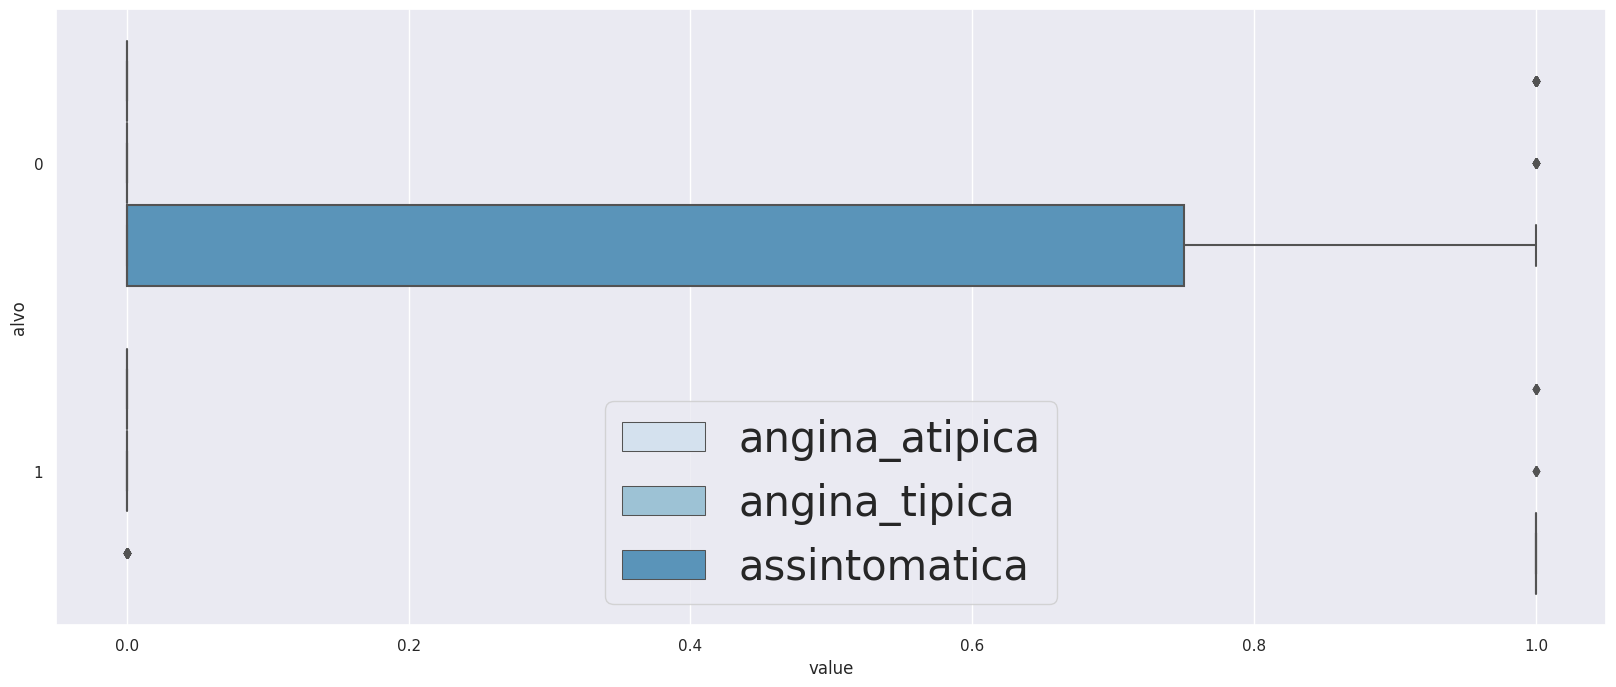

In [65]:
dados_first = pd.DataFrame()
dados_first = dados[['angina_atipica', 'angina_tipica', 'assintomatica', 'alvo']].copy()
dados_melt = pd.melt(dados_first, id_vars='alvo', var_name='Variável', value_name='value')
sns.set(rc={'figure.figsize': (20, 8)})
custom_palette = sns.color_palette('Blues', len(dados_first.columns))
sns.boxplot(y='alvo', x = 'value', hue='Variável', data=dados_melt, palette=custom_palette, orient='h')
plt.legend(fontsize=30)
plt.savefig('boxplot_3.jpg', dpi=300)

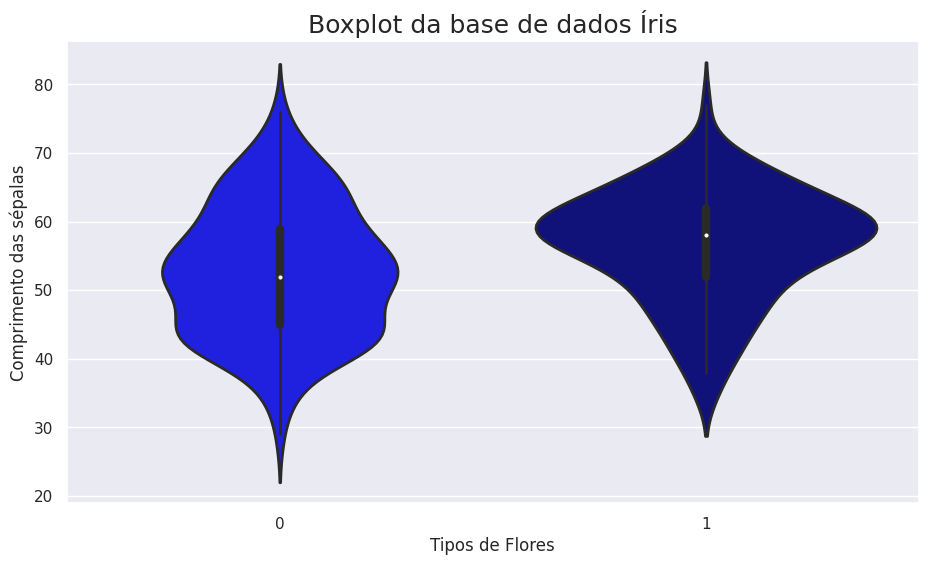

In [39]:
# Tamanho do gráfico em polegadas
plt.figure(figsize =(11, 6))

# Cores dos boxplot
colors = ['blue', 'darkblue', 'cian']

# plotviolin da coluna alvo em relação à idade
ax = sns.violinplot( x = "alvo", y ="idade", data = dados, linewidth = 2, palette = colors)

# Adicionando Título ao gráfico
plt.title("Idade ", loc="center", fontsize=18)
plt.xlabel("Tipos de Flores")
plt.ylabel("Comprimento das sépalas")

plt.show()

### Correlação 

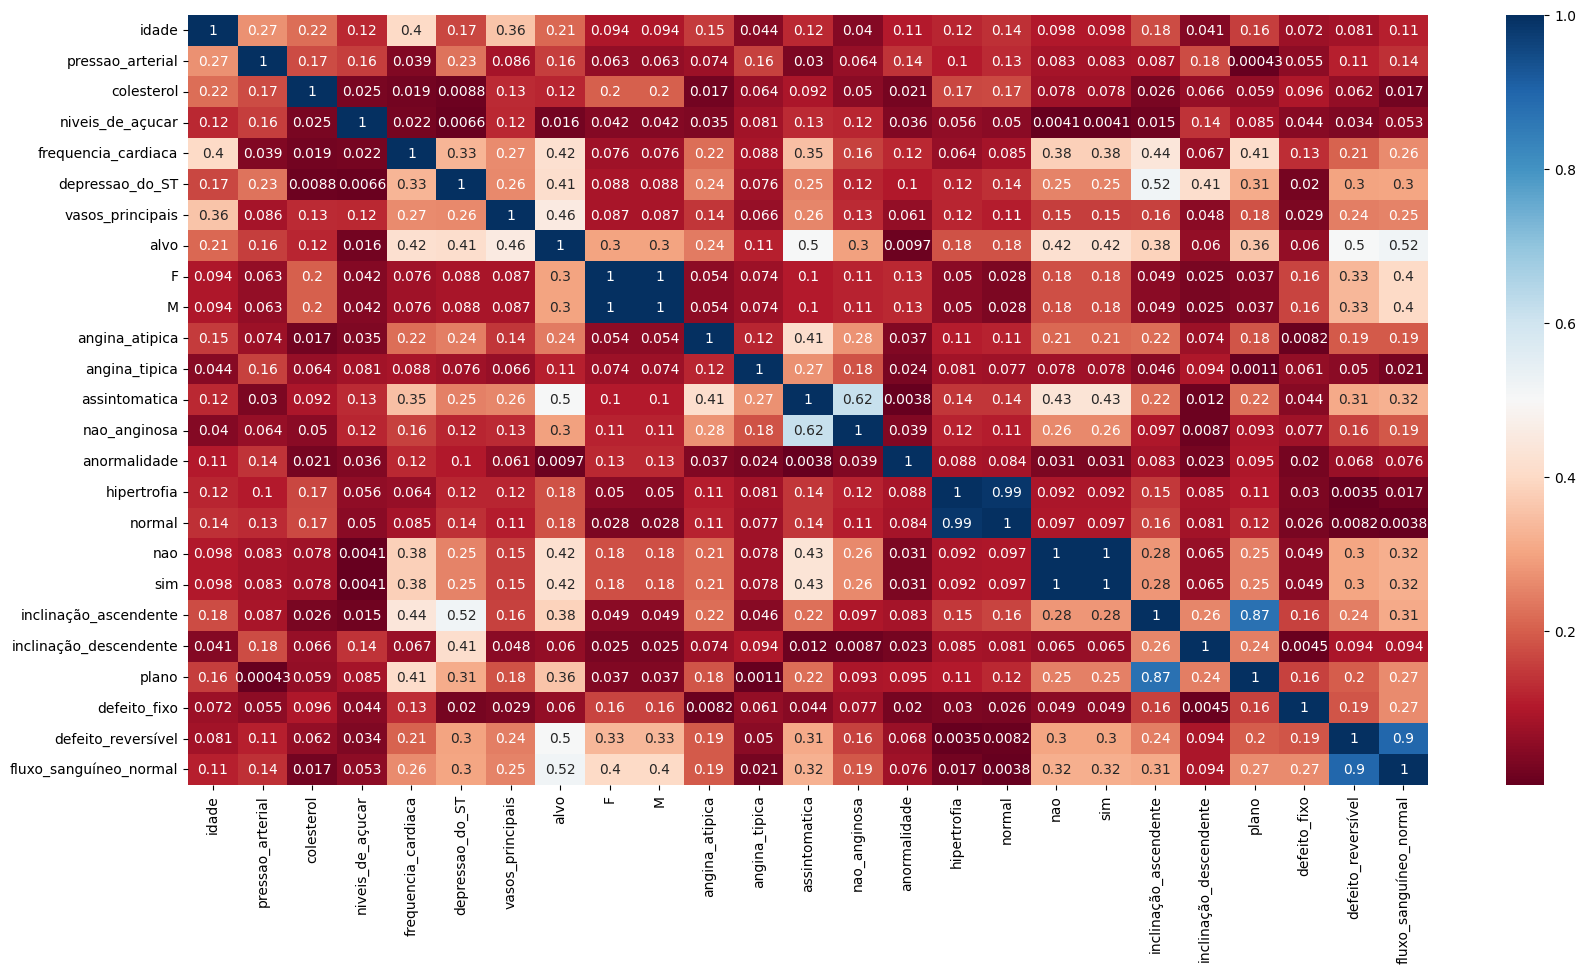

In [ ]:
plt.figure(figsize = (20,10))
corr_abs = abs(dados.corr(numeric_only = True))  # Calcula a correlação absoluta entre todas as variáveis
sns.heatmap(corr_abs, annot = True, cmap = 'RdBu', cbar=True)
plt.show()

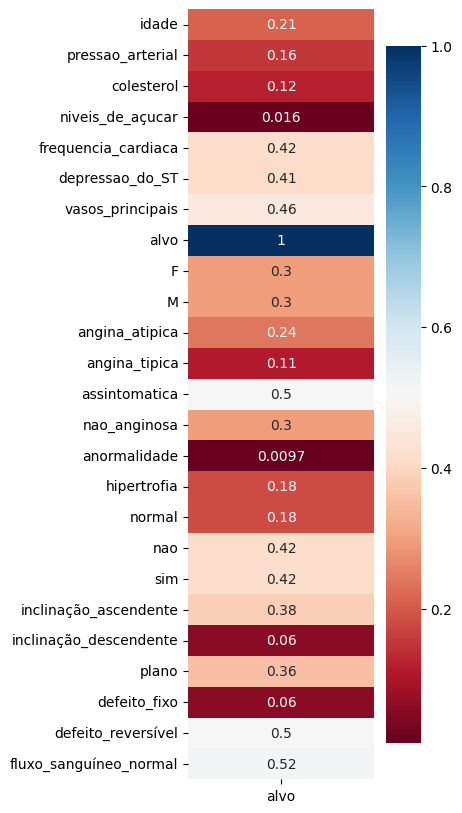

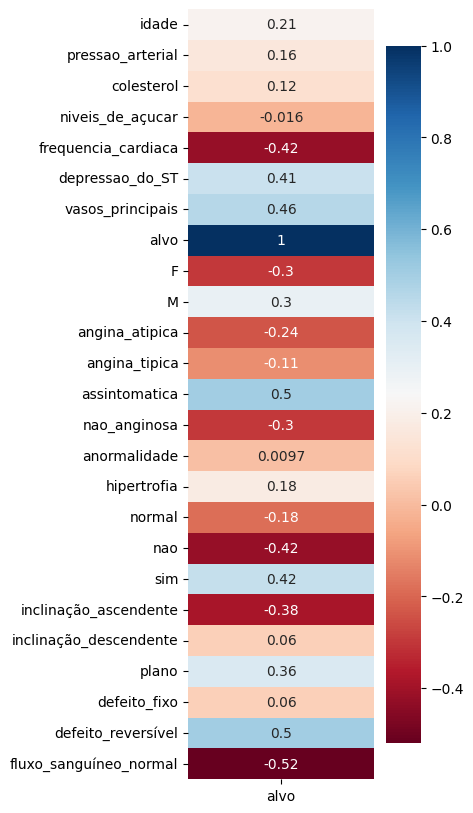

alvo                      1.000000
fluxo_sanguíneo_normal    0.519257
assintomatica             0.502369
defeito_reversível        0.502038
vasos_principais          0.455336
sim                       0.419303
nao                       0.419303
frequencia_cardiaca       0.418514
depressao_do_ST           0.411289
inclinação_ascendente     0.384536
plano                     0.356113
M                         0.297721
F                         0.297721
nao_anginosa              0.296717
angina_atipica            0.239929
idade                     0.212322
normal                    0.182278
hipertrofia               0.180562
pressao_arterial          0.155383
colesterol                0.118021
angina_tipica             0.110680
defeito_fixo              0.059761
inclinação_descendente    0.059761
niveis_de_açucar          0.016319
anormalidade              0.009658
Name: alvo, dtype: float64


In [ ]:
plt.figure(figsize = (3,10))
corr_abs = abs(dados.corr(numeric_only = True)['alvo'])  # Calcula a correlação absoluta entre 'alvo' e as outras variáveis
sns.heatmap(corr_abs.to_frame(), annot = True, cmap = 'RdBu', cbar=True)
plt.show()
plt.figure(figsize = (3,10))
corr = dados.corr(numeric_only = True)['alvo']  # Calcula a correlação entre 'alvo' e as outras variáveis
sns.heatmap(corr.to_frame(), annot = True, cmap = 'RdBu', cbar=True)
plt.show()

corr_test1 = abs(dados.corr(numeric_only = True)['alvo'])  # Calcula a correlação entre 'alvo' e as outras variáveis
corr_test1_sorted = corr_test1.sort_values(ascending=False)
print(corr_test1_sorted)

Fazer testes a partir da caluna alvo acerca dos valores menos correlacionados com ela:
 * Teste 1: Retirar as colunas de corr (abs) menor que 0.3
    * M                         0.297721
    * F                         0.297721
    * nao_anginosa              0.296717
    * angina_atipica            0.239929
    * idade                     0.212322
    * normal                    0.182278
    * hipertrofia               0.180562
    * pressao_arterial          0.155383
    * colesterol                0.118021
    * angina_tipica             0.110680
    * defeito_fixo              0.059761
    * inclinação_descendente    0.059761
    * niveis_de_açucar          0.016319
    * anormalidade              0.009658
 * Teste 2: Retirar as colunas que têm alta correlação entre si (0.61)
 * Teste 3: Teste 1 + Teste 2

### Modelagem de Dados

In [72]:
y = dados['alvo'] #y é a nossa coluna alvo
X = dados.drop('alvo', axis = 1)  #copia a tabela inteira, exceto a coluna alvo
sc = StandardScaler()   #normalização dos dados
sc_X = sc.fit_transform(X)

In [73]:
sc_X

array([[ 1.71209356, -0.07540984,  1.40221232, ..., -0.23385359,
        -0.79152134,  0.88108784],
       [ 1.38213977, -0.91675934,  6.0930045 , ..., -0.23385359,
         1.26338982, -1.13496061],
       [ 0.2822938 , -0.41194964,  0.21982255, ..., -0.23385359,
         1.26338982, -1.13496061],
       ...,
       [ 0.1723092 ,  0.48548982,  0.85947603, ..., -0.23385359,
        -0.79152134,  0.88108784],
       [ 0.2822938 ,  0.48548982, -1.11763472, ...,  4.27617987,
        -0.79152134, -1.13496061],
       [ 1.38213977,  1.60728915,  0.70440852, ..., -0.23385359,
        -0.79152134,  0.88108784]])

In [74]:
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: alvo, Length: 270, dtype: int64

### Teste 0 

In [37]:
dados_test3 = pd.DataFrame()
dados_test3 = dados.copy()

In [75]:
dados.head(2)

idade  pressao_arterial  colesterol  niveis_de_açucar  frequencia_cardiaca  \
0     70               130         322                 0                  109   
1     67               115         564                 0                  160   

   depressao_do_ST  vasos_principais  alvo  F  M  ...  hipertrofia  normal  \
0                2                 3     1  0  1  ...            1       0   
1                1                 0     0  1  0  ...            1       0   

   nao  sim  inclinação_ascendente  inclinação_descendente  plano  \
0    1    0                      0                       0      1   
1    1    0                      0                       0      1   

   defeito_fixo  defeito_reversível  fluxo_sanguíneo_normal  
0             0                   0                       1  
1             0                   1                       0  

[2 rows x 25 columns]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(sc_X, y, test_size=0.3, random_state=42)
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [77]:
print('R² = {}'.format(model.score(X_train, y_train).round(2)))

R² = 0.86


In [78]:
y_previsto_proba = model.predict_proba(X_test)
print(y_previsto_proba)
print("Acurácia: {}".format(model.score(X_test, y_test).round(4)))

[[0.49964423 0.50035577]
 [0.70862368 0.29137632]
 [0.92446014 0.07553986]
 [0.97721761 0.02278239]
 [0.90646508 0.09353492]
 [0.14021007 0.85978993]
 [0.69223216 0.30776784]
 [0.9771503  0.0228497 ]
 [0.72791978 0.27208022]
 [0.99130846 0.00869154]
 [0.94847976 0.05152024]
 [0.48807091 0.51192909]
 [0.16164199 0.83835801]
 [0.35208683 0.64791317]
 [0.73254482 0.26745518]
 [0.89004169 0.10995831]
 [0.84450731 0.15549269]
 [0.76134682 0.23865318]
 [0.06613248 0.93386752]
 [0.86667124 0.13332876]
 [0.0422564  0.9577436 ]
 [0.80829355 0.19170645]
 [0.86033212 0.13966788]
 [0.91932313 0.08067687]
 [0.85410924 0.14589076]
 [0.00379278 0.99620722]
 [0.35229701 0.64770299]
 [0.06324201 0.93675799]
 [0.98039946 0.01960054]
 [0.93044944 0.06955056]
 [0.99518472 0.00481528]
 [0.96669532 0.03330468]
 [0.18385352 0.81614648]
 [0.95309721 0.04690279]
 [0.72959129 0.27040871]
 [0.57060732 0.42939268]
 [0.0862363  0.9137637 ]
 [0.92339743 0.07660257]
 [0.25499993 0.74500007]
 [0.97966751 0.02033249]


In [ ]:
count = 0
y_previsto = model.predict(X_test)
for y in y_previsto:
  if y_previsto[y] == 1:
    count = 1 + count
print(count)

58


In [ ]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.23


In [ ]:
entrada = X_test[0:1]
entrada

array([[ 0.2822938 , -0.18758978, -0.40044749, -0.41702883,  0.01393527,
        -0.72939341,  0.34987077, -0.6894997 ,  0.6894997 , -0.42919754,
        -0.28284271, -0.95650071,  1.55490241, -0.08638684,  0.98529332,
        -0.9707966 ,  0.7012223 , -0.7012223 , -0.96362411, -0.26726124,
         1.10141489, -0.23385359,  1.26338982, -1.13496061]])

## Teste 1

## Retirar as colunas de corr (abs) menor que 0.3 
 * Teste 1: Retirar as colunas de corr (abs) menor que 0.3
    * M                         0.297721
    * F                         0.297721
    * nao_anginosa              0.296717
    * angina_atipica            0.239929
    * idade                     0.212322
    * normal                    0.182278
    * hipertrofia               0.180562
    * pressao_arterial          0.155383
    * colesterol                0.118021
    * angina_tipica             0.110680
    * defeito_fixo              0.059761
    * inclinação_descendente    0.059761
    * niveis_de_açucar          0.016319
    * anormalidade              0.009658



In [99]:
dados_test1 = dados.drop(['idade', 'M','F', 'nao_anginosa', 'anormalidade', 'defeito_fixo','inclinação_descendente','angina_tipica', 'angina_atipica', 'pressao_arterial', 'normal','hipertrofia' ,'colesterol', 'niveis_de_açucar'], axis=1)

In [100]:
y = dados_test1['alvo'] #y é a nossa coluna alvo
X = dados_test1.drop('alvo', axis = 1)  #copia a tabela inteira, exceto a coluna alvo
sc = StandardScaler()   #normalização dos dados
sc_X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(sc_X, y, test_size=0.3, random_state=42)
#model = LogisticRegression(random_state=0)
from sklearn.svm import SVR
model=SVR(C=1.0, epsilon=0.2)
model.fit(X_train, y_train)

SVR(epsilon=0.2)

In [101]:
y = dados_test1['alvo'] #y é a nossa coluna alvo
X = dados_test1.drop('alvo', axis = 1)  #copia a tabela inteira, exceto a coluna alvo
sc = StandardScaler()   #normalização dos dados
sc_X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(sc_X, y, test_size=0.3, random_state=42)
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
print('R² = {}'.format(model.score(X_train, y_train).round(2)))

R² = 0.87


In [102]:
y_previsto_proba = model.predict_proba(X_test)
print(y_previsto_proba)
print("Acurácia: {}".format(model.score(X_test, y_test).round(2)))

[[0.49444203 0.50555797]
 [0.65055752 0.34944248]
 [0.97170463 0.02829537]
 [0.91064886 0.08935114]
 [0.61005128 0.38994872]
 [0.21648829 0.78351171]
 [0.73460853 0.26539147]
 [0.97321216 0.02678784]
 [0.51709273 0.48290727]
 [0.97506612 0.02493388]
 [0.74970231 0.25029769]
 [0.55282184 0.44717816]
 [0.03253054 0.96746946]
 [0.4795129  0.5204871 ]
 [0.79669827 0.20330173]
 [0.87708931 0.12291069]
 [0.39121754 0.60878246]
 [0.80124665 0.19875335]
 [0.11038209 0.88961791]
 [0.75619047 0.24380953]
 [0.06600594 0.93399406]
 [0.87258421 0.12741579]
 [0.79983493 0.20016507]
 [0.93617281 0.06382719]
 [0.89697455 0.10302545]
 [0.00350572 0.99649428]
 [0.54785553 0.45214447]
 [0.26015668 0.73984332]
 [0.92098737 0.07901263]
 [0.87869603 0.12130397]
 [0.97264181 0.02735819]
 [0.83425685 0.16574315]
 [0.73819887 0.26180113]
 [0.80867545 0.19132455]
 [0.80603039 0.19396961]
 [0.50691717 0.49308283]
 [0.05428035 0.94571965]
 [0.88743051 0.11256949]
 [0.22660222 0.77339778]
 [0.87908337 0.12091663]


In [ ]:
y_test

30     1
116    1
79     0
127    0
196    0
      ..
55     0
97     1
200    0
38     0
154    0
Name: alvo, Length: 81, dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_previsto)

0.18518518518518517

### Teste 2


  * Retirar outliers


In [103]:
df = pd.DataFrame()
df = dados
df.head(1)

idade  pressao_arterial  colesterol  niveis_de_açucar  frequencia_cardiaca  \
0     70               130         322                 0                  109   

   depressao_do_ST  vasos_principais  alvo  F  M  ...  hipertrofia  normal  \
0                2                 3     1  0  1  ...            1       0   

   nao  sim  inclinação_ascendente  inclinação_descendente  plano  \
0    1    0                      0                       0      1   

   defeito_fixo  defeito_reversível  fluxo_sanguíneo_normal  
0             0                   0                       1  

[1 rows x 25 columns]

In [104]:
dados.shape

(270, 25)

In [105]:
dados.columns

Index(['idade', 'pressao_arterial', 'colesterol', 'niveis_de_açucar',
       'frequencia_cardiaca', 'depressao_do_ST', 'vasos_principais', 'alvo',
       'F', 'M', 'angina_atipica', 'angina_tipica', 'assintomatica',
       'nao_anginosa', 'anormalidade', 'hipertrofia', 'normal', 'nao', 'sim',
       'inclinação_ascendente', 'inclinação_descendente', 'plano',
       'defeito_fixo', 'defeito_reversível', 'fluxo_sanguíneo_normal'],
      dtype='object')

In [106]:
def remove_outliers(df,columns,n_std):        # Removendo outliers utilizando Standart Deviation
    for col in columns:                       # Temos em consideração que os dados têm uma Distrib.Gaussiana
        print('Trabalhando na coluna: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
        print('Novo formato do DataFrame: {}'.format(df.shape))
        
    return df

In [120]:
number = 3      # Número de desvio padrões que ele vai usar
dados_test2 = pd.DataFrame()
dados_test2 = remove_outliers(dados, dados.columns, number)

Trabalhando na coluna: idade
Novo formato do DataFrame: (270, 25)
Trabalhando na coluna: pressao_arterial
Novo formato do DataFrame: (268, 25)
Trabalhando na coluna: colesterol
Novo formato do DataFrame: (264, 25)
Trabalhando na coluna: niveis_de_açucar
Novo formato do DataFrame: (264, 25)
Trabalhando na coluna: frequencia_cardiaca
Novo formato do DataFrame: (264, 25)
Trabalhando na coluna: depressao_do_ST
Novo formato do DataFrame: (260, 25)
Trabalhando na coluna: vasos_principais
Novo formato do DataFrame: (260, 25)
Trabalhando na coluna: alvo
Novo formato do DataFrame: (260, 25)
Trabalhando na coluna: F
Novo formato do DataFrame: (260, 25)
Trabalhando na coluna: M
Novo formato do DataFrame: (260, 25)
Trabalhando na coluna: angina_atipica
Novo formato do DataFrame: (260, 25)
Trabalhando na coluna: angina_tipica
Novo formato do DataFrame: (241, 25)
Trabalhando na coluna: assintomatica
Novo formato do DataFrame: (241, 25)
Trabalhando na coluna: nao_anginosa
Novo formato do DataFrame: (

In [121]:
dados_test2.shape

(215, 25)

In [128]:
y = dados_test2['alvo'] #y é a nossa coluna alvo
X = dados_test2.drop('alvo', axis = 1)  #copia a tabela inteira, exceto a coluna alvo
sc = StandardScaler()   #normalização dos dados
sc_X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(sc_X, y, test_size=0.3, random_state=42)
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
y_previsto_proba = model.predict_proba(X_test)
print(y_previsto_proba)
print("Acurácia: {}".format(model.score(X_test, y_test)))

[[0.94089556 0.05910444]
 [0.84707831 0.15292169]
 [0.81107464 0.18892536]
 [0.01116346 0.98883654]
 [0.6474954  0.3525046 ]
 [0.47139441 0.52860559]
 [0.97280893 0.02719107]
 [0.22769652 0.77230348]
 [0.03424015 0.96575985]
 [0.10267552 0.89732448]
 [0.02210237 0.97789763]
 [0.59868686 0.40131314]
 [0.06168562 0.93831438]
 [0.91461859 0.08538141]
 [0.98200102 0.01799898]
 [0.96371809 0.03628191]
 [0.34334976 0.65665024]
 [0.9774414  0.0225586 ]
 [0.47724046 0.52275954]
 [0.83871488 0.16128512]
 [0.81468403 0.18531597]
 [0.54695868 0.45304132]
 [0.99151574 0.00848426]
 [0.05447276 0.94552724]
 [0.52753048 0.47246952]
 [0.14494516 0.85505484]
 [0.19394713 0.80605287]
 [0.79005027 0.20994973]
 [0.0530545  0.9469455 ]
 [0.19162093 0.80837907]
 [0.96204016 0.03795984]
 [0.66298056 0.33701944]
 [0.55210835 0.44789165]
 [0.54370238 0.45629762]
 [0.99267234 0.00732766]
 [0.91739552 0.08260448]
 [0.19368119 0.80631881]
 [0.03405884 0.96594116]
 [0.97069483 0.02930517]
 [0.8644961  0.1355039 ]


### Teste 3

  * Pares altamente relacionados (>0.85):
    * inclinacao_ascendente, plano
    * nao, sim
    * defeito reversivel, fluxo sanguineo normal
    * hipertrofia, normal
    * feminino, masculino

In [113]:
dados_test3 = pd.DataFrame()
dados_test3 = dados.copy()

In [114]:
dados_test3.columns

Index(['idade', 'pressao_arterial', 'colesterol', 'niveis_de_açucar',
       'frequencia_cardiaca', 'depressao_do_ST', 'vasos_principais', 'alvo',
       'F', 'M', 'angina_atipica', 'angina_tipica', 'assintomatica',
       'nao_anginosa', 'anormalidade', 'hipertrofia', 'normal', 'nao', 'sim',
       'inclinação_ascendente', 'inclinação_descendente', 'plano',
       'defeito_fixo', 'defeito_reversível', 'fluxo_sanguíneo_normal'],
      dtype='object')

In [115]:
dados_test3 = dados_test3.drop(['normal','nao'], axis=1)    # teste 0 - acurácia 0.8148

Dropping:
  * Todas as colunas marcadas acima ::: 0.8
  * Apenas M ::: 0.8
  * Apenas normal ::: 0.8148
  * Apenas plano ::: 0.8025
  * Apenas nao ::: 0.8148
  * Apenas defeito_reversível ::: 0.79

Compare os resultados com a acurácia do Teste 0:
  * Acurácia do Teste 0 ::: 0.8148

O que podemos inferir?
  * Normal e Não aparentemente não interferem no resultado final, logo, podemos descartá-las
  * Descartando as duas, temos o mesmo resultado do Teste 0, ou seja, Acurácia ::: 0.8148

In [116]:
y = dados_test3['alvo'] #y é a nossa coluna alvo
X = dados_test3.drop('alvo', axis = 1)  #copia a tabela inteira, exceto a coluna alvo
sc = StandardScaler()   #normalização dos dados
sc_X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(sc_X, y, test_size=0.3, random_state=42)
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
y_previsto_proba = model.predict_proba(X_test)
print(y_previsto_proba)
print("Acurácia: {}".format(model.score(X_test, y_test)))

[[0.49637635 0.50362365]
 [0.70436314 0.29563686]
 [0.92458128 0.07541872]
 [0.97693862 0.02306138]
 [0.90390573 0.09609427]
 [0.14279382 0.85720618]
 [0.69242973 0.30757027]
 [0.97706547 0.02293453]
 [0.72499861 0.27500139]
 [0.99119005 0.00880995]
 [0.9469333  0.0530667 ]
 [0.48256745 0.51743255]
 [0.16369758 0.83630242]
 [0.35417542 0.64582458]
 [0.73661352 0.26338648]
 [0.89025163 0.10974837]
 [0.8402197  0.1597803 ]
 [0.7587793  0.2412207 ]
 [0.06507898 0.93492102]
 [0.86555286 0.13444714]
 [0.04144292 0.95855708]
 [0.80783985 0.19216015]
 [0.85930752 0.14069248]
 [0.92156605 0.07843395]
 [0.85405184 0.14594816]
 [0.00379663 0.99620337]
 [0.34979161 0.65020839]
 [0.06551411 0.93448589]
 [0.97998446 0.02001554]
 [0.93292764 0.06707236]
 [0.99514885 0.00485115]
 [0.96610802 0.03389198]
 [0.18637791 0.81362209]
 [0.9524398  0.0475602 ]
 [0.72776072 0.27223928]
 [0.5775733  0.4224267 ]
 [0.08529318 0.91470682]
 [0.92388018 0.07611982]
 [0.25608114 0.74391886]
 [0.97916243 0.02083757]


### Teste 4

* Teste1 + Teste 2 + Teste 3

In [139]:
dados_test4 = pd.DataFrame()
dados_test4 = dados_test2.copy()
dados_test4.shape

(215, 25)

In [140]:
# Retira-se as colunas referentes ao teste 3
dados_test4 = dados_test4.drop(['normal','nao'], axis=1)
# Retira-se as colunas referentes ao teste 1
dados_test4 = dados_test4.drop(['idade', 'M','F', 'nao_anginosa', 'anormalidade', 'defeito_fixo','inclinação_descendente','angina_tipica', 'angina_atipica', 'pressao_arterial','hipertrofia' ,'colesterol', 'niveis_de_açucar'], axis=1)
y = dados_test4['alvo'] #y é a nossa coluna alvo
X = dados_test4.drop('alvo', axis = 1)  #copia a tabela inteira, exceto a coluna alvo
sc = StandardScaler()   #normalização dos dados
sc_X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(sc_X, y, test_size=0.3, random_state=42)
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
y_previsto_proba = model.predict_proba(X_test)
print(y_previsto_proba)
print("Acurácia: {}".format(model.score(X_test, y_test))) # Acurácia: 0.89

[[0.91371181 0.08628819]
 [0.84461642 0.15538358]
 [0.75276235 0.24723765]
 [0.02431836 0.97568164]
 [0.6443774  0.3556226 ]
 [0.40291267 0.59708733]
 [0.9439802  0.0560198 ]
 [0.12071463 0.87928537]
 [0.05871087 0.94128913]
 [0.07941809 0.92058191]
 [0.05009622 0.94990378]
 [0.53564373 0.46435627]
 [0.07813539 0.92186461]
 [0.96306445 0.03693555]
 [0.95222004 0.04777996]
 [0.94562895 0.05437105]
 [0.64252056 0.35747944]
 [0.93167889 0.06832111]
 [0.41621584 0.58378416]
 [0.93267835 0.06732165]
 [0.78042077 0.21957923]
 [0.49293673 0.50706327]
 [0.92317395 0.07682605]
 [0.14767483 0.85232517]
 [0.1767036  0.8232964 ]
 [0.05656946 0.94343054]
 [0.4982587  0.5017413 ]
 [0.73093351 0.26906649]
 [0.2269159  0.7730841 ]
 [0.35823023 0.64176977]
 [0.91117118 0.08882882]
 [0.93559589 0.06440411]
 [0.83423198 0.16576802]
 [0.57535603 0.42464397]
 [0.95829251 0.04170749]
 [0.94612542 0.05387458]
 [0.60592415 0.39407585]
 [0.12737457 0.87262543]
 [0.9428825  0.0571175 ]
 [0.94280967 0.05719033]


In [141]:
dados_test4.columns

Index(['frequencia_cardiaca', 'depressao_do_ST', 'vasos_principais', 'alvo',
       'assintomatica', 'sim', 'inclinação_ascendente', 'plano',
       'defeito_reversível', 'fluxo_sanguíneo_normal'],
      dtype='object')

## Parte II

In [135]:
dados_testfinal = pd.DataFrame()
dados_testfinal = dados_test4.copy()

In [137]:
prever_doenca_cardiaca = model.predict_proba(X_test)
prever_doenca_cardiaca

array([[0.91371181, 0.08628819],
       [0.84461642, 0.15538358],
       [0.75276235, 0.24723765],
       [0.02431836, 0.97568164],
       [0.6443774 , 0.3556226 ],
       [0.40291267, 0.59708733],
       [0.9439802 , 0.0560198 ],
       [0.12071463, 0.87928537],
       [0.05871087, 0.94128913],
       [0.07941809, 0.92058191],
       [0.05009622, 0.94990378],
       [0.53564373, 0.46435627],
       [0.07813539, 0.92186461],
       [0.96306445, 0.03693555],
       [0.95222004, 0.04777996],
       [0.94562895, 0.05437105],
       [0.64252056, 0.35747944],
       [0.93167889, 0.06832111],
       [0.41621584, 0.58378416],
       [0.93267835, 0.06732165],
       [0.78042077, 0.21957923],
       [0.49293673, 0.50706327],
       [0.92317395, 0.07682605],
       [0.14767483, 0.85232517],
       [0.1767036 , 0.8232964 ],
       [0.05656946, 0.94343054],
       [0.4982587 , 0.5017413 ],
       [0.73093351, 0.26906649],
       [0.2269159 , 0.7730841 ],
       [0.35823023, 0.64176977],
       [0.

In [131]:
pessoas = pd.read_excel('/content/drive/MyDrive/desafio final doenças cardíacas/Pessoas.xlsx')
pessoas

FileNotFoundError: ignored

In [ ]:
sc_pessoas = sc.transform(pessoas)

In [ ]:
predizer = reg.predict(sc_pessoas)
predizer

In [ ]:
pessoas['risco'] = predizer*100

In [ ]:
pessoas.to_excel('/content/Pessoas_com_risco.xlsx',index=False)

In [142]:
def preverDoencaCardiaca(dados_testfinal):
  y = dados_testfinal['alvo'] #y é a nossa coluna alvo
  X = dados_testfinal.drop('alvo', axis = 1)  #copia a tabela inteira, exceto a coluna alvo
  sc = StandardScaler()   #normalização dos dados
  sc_X = sc.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(sc_X, y, test_size=0.3, random_state=42)
  model = LogisticRegression(random_state=0)
  model.fit(X_train, y_train)
  y_previsto_proba = model.predict_proba(X_test)
  print(y_previsto_proba)
  print("Acurácia: {}".format(model.score(X_test, y_test))) # Acurácia: 0.89

In [138]:
dados_testfinal.columns

Index(['frequencia_cardiaca', 'depressao_do_ST', 'vasos_principais', 'alvo',
       'assintomatica', 'sim', 'inclinação_ascendente', 'plano',
       'defeito_reversível', 'fluxo_sanguíneo_normal'],
      dtype='object')

In [146]:
# Importando bibliotecas
from ipywidgets import widgets, HBox, VBox
from IPython.display import display

# Criando os controles do formulário
freq_cardiaca = widgets.Text(description="Freq. Cardíaca:")
depre_do_ST = widgets.Text(description="Depressão do ST:")
vasos_princ = widgets.Text(description="Vasos Principais:")
assint = widgets.Text(description="Assintomática:")
sim = widgets.Text(description="Sim:")
inclinacao_asc = widgets.Text(description="Inclinação Ascendente:")
plano = widgets.Text(description="Plano:")
def_reversivel = widgets.Text(description="Defeito Reversível:")
fluxo_normal = widgets.Text(description="Fluxo Sanguíneo Normal:")

botao = widgets.Button(description="Simular")

# Posicionando os controles
left = VBox([freq_cardiaca, depre_do_ST, vasos_princ, assint, sim])
right = VBox([inclinacao_asc, plano, def_reversivel, fluxo_normal])
inputs = HBox([left, right])

# Função de simulação
def simulador(sender):
    entrada=[[
                float(freq_cardiaca.value if freq_cardiaca.value else 0), 
                float(depre_do_ST.value if depre_do_ST.value else 0), 
                float(vasos_princ.value if vasos_princ.value else 0), 
                float(assint.value if assint.value else 0), 
                float(sim.value if sim.value else 0), 
                float(inclinacao_asc.value if inclinacao_asc.value else 0),
                float(plano.value if plano.value else 0),
                float(def_reversivel.value if def_reversivel.value else 0),
                float(fluxo_normal.value if fluxo_normal.value else 0)
             ]]
    X.append(entrada)
    sc = StandardScaler()   #normalização dos dados
    sc_X = sc.fit_transform(X)
    print('$ {0:.2f}'.format(model.predict_proba(entrada)[0]))

# Atribuindo a função "simulador" ao evento click do botão
botao.on_click(simulador) 

In [144]:
display(inputs, botao)

Button(description='Simular', style=ButtonStyle())